E: -295.6187264093084
E: -236.203033514
E: -286.935088152
E: -229.02013962
E: -148.734720695


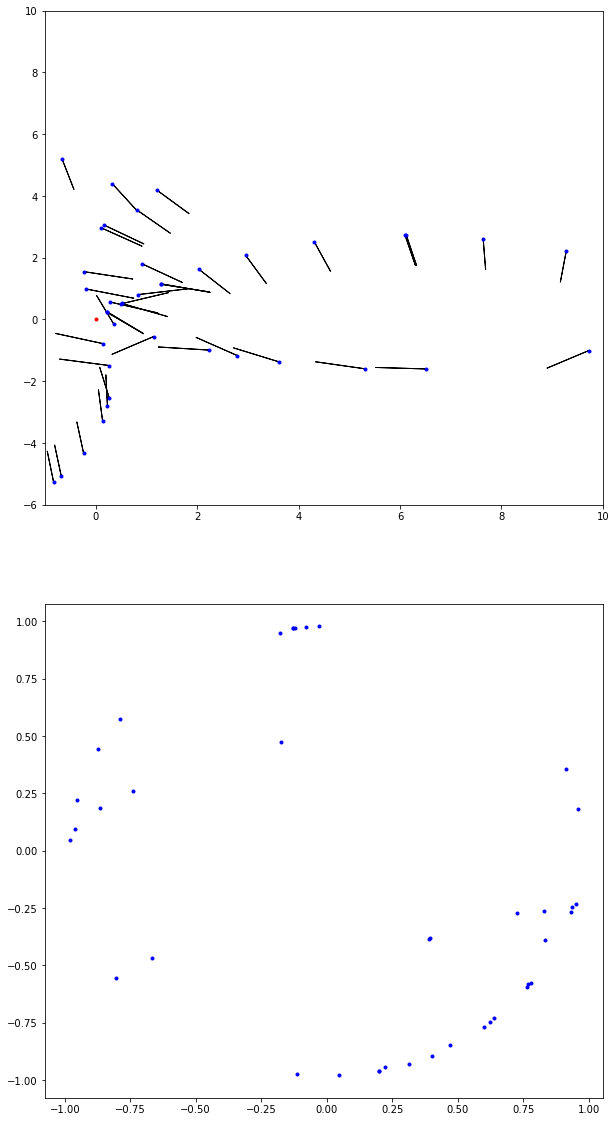

In [124]:
import scipy.special as scipySp
import math
import matplotlib.pyplot as plt
data = [(0.29, 0.562), (0.917, 1.799), (0.813, 3.543), (0.33, 4.39), (-0.66, 5.184), (-0.2, 0.99), (-0.24, 1.549), (0.11, 2.966), (0.16, 3.06), (1.2, 4.194),
       (0.21989799999999998, 0.23319099999999998), (0.23002199999999998, 0.243645), (0.500425, 0.505032), (0.514768, 0.518327), (0.8433459999999999, 0.8059480000000001), (1.27789, 1.1414900000000001), (1.2937299999999998, 1.15282), (6.09883, 2.72416), (6.12293, 2.72787), (2.03429, 1.6247), (2.95577, 2.0769800000000003), (4.31039, 2.50972), (9.275030000000001, 2.2054300000000002), (7.63803, 2.61114),
       (0.15,-0.784), (0.267, -1.491), (0.265,-2.529), (0.232, -2.791), (0.136, -3.273), (-0.83, -5.257), (-0.68, -5.056), (-0.24, -4.311),
       (0.36,-0.158), (1.14, -0.554), (2.23, -0.99), (3.61, -1.37), (5.31, -1.597), (6.52, -1.602), (2.79, -1.167), (9.72, -1.007)]
(-0.05,-0.42)
#for line in open('rotorTest.csv'):
#    line = line.strip()
#    if line != '' and line != 'x,y':
#        data.append(tuple(float(i) for i in line.split(',')))

#print(data)

rotors = []
for x,y in data:
    d = math.sqrt(x**2 + y**2)
    rotors.append((x/d, y/d))


T = 1
dK = 1
for it in range(5):
    #print(data)
    #print(rotors)
    newRotors = []
    energy = 0
    for i1 in range(len(rotors)):
        sx = 0
        sy = 0
        weights = 0
        v1x,v1y = rotors[i1]
        x1,y1 = data[i1]
        ca = (x1*v1x + y1*v1y)/math.sqrt((x1**2+y1**2)*(v1x**2+v1y**2))
        ct = 2*ca**2 - 1
        K = math.sqrt((2/(x1**2+y1**2))*abs(1 - ct))
        for i2 in range(len(rotors)):
            x2,y2 = data[i2]
            v2x,v2y = rotors[i2]
            
            ca2 = (x2*v2x + y2*v2y)/math.sqrt((x2**2+y2**2)*(v2x**2+v2y**2))
            ct2 = 2*ca2**2 - 1
            K2 = math.sqrt((2/(x2**2+y2**2))*abs(1 - ct2))
            
            if abs(K2 - K) < dK:
                
                phi = math.atan2(y2-y1, x2-x1)
                #d2 = (x2 - x1)**2 + (y2 - y1)**2
                #weight = 1#math.exp(-0.01*d2)
                sx += (math.cos(2*phi)*v2x + math.sin(2*phi)*v2y)#*weight
                sy += (math.sin(2*phi)*v2x - math.cos(2*phi)*v2y)#*weight
        
        magS = math.sqrt(sx**2 + sy**2)
        newx = sx/magS * scipySp.iv(1, magS/T) / scipySp.iv(0, magS/T)
        newy = sy/magS * scipySp.iv(1, magS/T) / scipySp.iv(0, magS/T)
        
        energy += v1x*sx + v1y*sy
        #newx = math.tanh(sx/T)
        #newy = math.tanh(sy/T)
        #size = math.sqrt(newx**2 + newy**2)
        #effect = 1#math.exp(-0.1 * (x1**2 + y1**2))
        newRotors.append((newx, newy))
    for i in range(len(rotors)):
        rotors[i] = newRotors[i]
    #if it%10 == 0:
    print("E:", energy)
    T *= 0.9
    dK*= 0.9

plt.figure(figsize = (10,20))
plt.subplot(211)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.plot([0], [0], 'r.')
plt.axis([-1,10,-6,10])

plt.subplot(212)
plt.plot([x for x,y in rotors], [y for x,y in rotors], 'b.')
plt.show()

#print(data)
#print(rotors)

-1.5707963267948966
E: -184.51278280741238


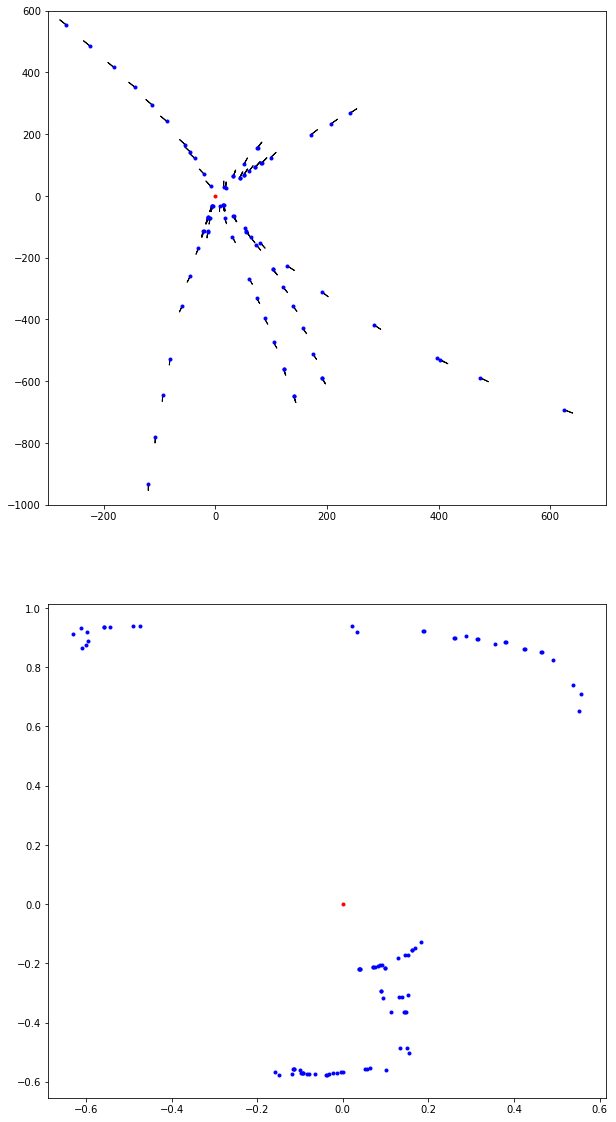

In [13]:
import scipy.special as scipySp
import math
import matplotlib.pyplot as plt
data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (73.0354, -157.92, -818.0), (60.1184, 79.7438, -818.0), (-54.1753, 165.575, -822.0), (63.3417, -134.233, -698.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (-44.8802, 141.85, -702.0), (-22.2046, -114.122, -598.0), (54.952, -114.613, -598.0), (55.3136, -115.388, -602.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (-37.4606, 121.916, -602.0), (18.3987, 26.0333, -262.633), (-6.25713, -31.6323, -167.762), (15.0978, -29.3332, -157.145), (-8.32315, 30.92, -153.448), (13.7425, -29.0253, -53.7111), (14.2403, -30.0991, -55.5892), (14.4652, 28.4783, -64.2589), (-6.02516, -31.1495, 70.1153), (-4.49266, -31.7318, 105.607), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.6971, -69.7712, -366.719), (-14.071, -71.6991, -376.774), (32.428, -64.9097, -342.31), (-19.9141, 69.6304, -343.239), (32.2492, 64.381, -141.323), (31.6714, -64.8493, -117.473), (32.0247, 63.936, -140.349), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (-9.34723, -71.9969, 242.672), (16.3643, -70.7321, 319.102), (51.4933, 104.393, -226.716), (52.2148, -103.166, -186.743), (-21.2823, -114.332, 264.273), (-13.6415, -114.648, 387.624), (-13.8145, -116.58, 394.172), (74.659, 154.446, -332.805), (75.5073, 156.317, -336.749), (80.2835, -151.741, -276.154), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (190.925, -589.678, -2945.5), (190.872, -589.77, -2948.5), (240.578, 267.294, -2948.5), (-267.803, 554.227, -2945.5), (174.429, -510.67, -2554.5), (206.721, 233.044, -2548.5), (-225.436, 486.134, -2551.5), (156.161, -427.805, -2151.5), (171.297, 198.543, -2148.5), (-181.903, 415.843, -2151.5), (138.333, -355.741, -1798.5), (-144.258, 351.669, -1795.5), (121.071, -294.981, -1498.5), (-114.065, 295.615, -1495.5), (102.655, -237.833, -1218.5), (102.691, -237.807, -1215.5), (-87.6601, 242.014, -1215.5), (128.364, -226.459, -417.8), (-45.4458, -260.608, 605.0), (190.677, -310.533, -584.2), (-59.6324, -356.696, 827.6), (283.547, -417.049, -809.4), (402.361, -529.773, -1069.6), (397.369, -525.466, -1059.4), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (624.078, -691.922, -1505.5), (474.165, -588.638, -1214.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
#for line in open('rotorTest.csv'):
#    line = line.strip()
#    if line != '' and line != 'x,y':
#        data.append(tuple(float(i) for i in line.split(',')))

#print(data)

rotors = []
for x,y,z in data:
    d = math.sqrt(x**2 + y**2 + z**2)
    rotors.append((x/d, y/d, z/d))

print(math.atan2(-1, 0))
T = 10
#dK = 100000
#numClose = 10
for it in range(1):
    #print(data)
    #print(rotors)
    newRotors = []
    energy = 0
    for i1 in range(len(rotors)):
        sx = 0
        sy = 0
        v1x,v1y,v1z = rotors[i1]
        x1,y1,z1 = data[i1]
        
        a = math.atan2(y1, x1)
        ra = math.atan2(v1y, v1x)
        
        centreAngle = 2 * ra - 2 * a
        #ca = (x1*v1x + y1*v1y)/math.sqrt((x1**2+y1**2)*(v1x**2+v1y**2))
        #ct = 2*ca**2 - 1
        #K = math.sqrt((2/(x1**2+y1**2))*abs(1 - ct))
        for i2 in range(len(rotors)):
            x2,y2,z2 = data[i2]
            v2x,v2y,v2z = rotors[i2]
            
            b = math.atan2(y2, x2)
            phi = math.atan2(y2-y1, x2-x1)
            subtendedAngle = phi - b

            if (abs(centreAngle - 2*subtendedAngle) < 1):
                #print(":", centreAngle, subtendedAngle)
            
                #ca2 = (x2*v2x + y2*v2y)/math.sqrt((x2**2+y2**2)*(v2x**2+v2y**2))
                #ct2 = 2*ca2**2 - 1
                #K2 = math.sqrt((2/(x2**2+y2**2))*abs(1 - ct2))

                #if abs(K2 - K) < dK:

                #d2 = (x2 - x1)**2 + (y2 - y1)**2
                #weight = 1#math.exp(-0.01*d2)
                sugx = (math.cos(2*phi)*v2x + math.sin(2*phi)*v2y)#*weight
                sugy = (math.sin(2*phi)*v2x - math.cos(2*phi)*v2y)#*weight
                if abs(math.atan2(sugy, sugx) - math.atan2(y1, x1)) > math.pi/2:
                    sx += sugx
                    sy += sugy
        
        newx = math.tanh(-sx/T)
        newy = math.tanh(-sy/T)
        
        energy += v1x*sx + v1y*sy
        #newx = math.tanh(sx/T)
        #newy = math.tanh(sy/T)
        #size = math.sqrt(newx**2 + newy**2)
        #effect = 1#math.exp(-0.1 * (x1**2 + y1**2))
        newRotors.append((newx, newy, v1z))
    for i in range(len(rotors)):
        rotors[i] = newRotors[i]
    #if it%10 == 0:
    print("E:", energy)
    #T *= 0.9
    #dK*= 0.5

plt.figure(figsize = (10,20))
plt.subplot(211)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.05
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.plot([0], [0], 'r.')
plt.axis([-300,700,-1000,600])

plt.subplot(212)
plt.plot([x for x,y,z in rotors], [y for x,y,z in rotors], 'b.')
plt.plot([0], [0], 'r.')
plt.show()

In [1]:
import scipy.special as scipySp
import math
import matplotlib.pyplot as plt
#data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (60.1184, 79.7438, -818.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (18.3987, 26.0333, -262.633), (-6.02516, -31.1495, 70.1153), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (16.3643, -70.7321, 319.102), (-21.2823, -114.332, 264.273), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (240.578, 267.294, -2948.5), (206.721, 233.044, -2548.5), (171.297, 198.543, -2148.5), (-45.4458, -260.608, 605.0), (-59.6324, -356.696, 827.6), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (73.0354, -157.92, -818.0), (60.1184, 79.7438, -818.0), (-54.1753, 165.575, -822.0), (63.3417, -134.233, -698.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (-44.8802, 141.85, -702.0), (-22.2046, -114.122, -598.0), (54.952, -114.613, -598.0), (55.3136, -115.388, -602.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (-37.4606, 121.916, -602.0), (18.3987, 26.0333, -262.633), (-6.25713, -31.6323, -167.762), (15.0978, -29.3332, -157.145), (-8.32315, 30.92, -153.448), (13.7425, -29.0253, -53.7111), (14.2403, -30.0991, -55.5892), (14.4652, 28.4783, -64.2589), (-6.02516, -31.1495, 70.1153), (-4.49266, -31.7318, 105.607), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.6971, -69.7712, -366.719), (-14.071, -71.6991, -376.774), (32.428, -64.9097, -342.31), (-19.9141, 69.6304, -343.239), (32.2492, 64.381, -141.323), (31.6714, -64.8493, -117.473), (32.0247, 63.936, -140.349), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (-9.34723, -71.9969, 242.672), (16.3643, -70.7321, 319.102), (51.4933, 104.393, -226.716), (52.2148, -103.166, -186.743), (-21.2823, -114.332, 264.273), (-13.6415, -114.648, 387.624), (-13.8145, -116.58, 394.172), (74.659, 154.446, -332.805), (75.5073, 156.317, -336.749), (80.2835, -151.741, -276.154), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (190.925, -589.678, -2945.5), (190.872, -589.77, -2948.5), (240.578, 267.294, -2948.5), (-267.803, 554.227, -2945.5), (174.429, -510.67, -2554.5), (206.721, 233.044, -2548.5), (-225.436, 486.134, -2551.5), (156.161, -427.805, -2151.5), (171.297, 198.543, -2148.5), (-181.903, 415.843, -2151.5), (138.333, -355.741, -1798.5), (-144.258, 351.669, -1795.5), (121.071, -294.981, -1498.5), (-114.065, 295.615, -1495.5), (102.655, -237.833, -1218.5), (102.691, -237.807, -1215.5), (-87.6601, 242.014, -1215.5), (128.364, -226.459, -417.8), (-45.4458, -260.608, 605.0), (190.677, -310.533, -584.2), (-59.6324, -356.696, 827.6), (283.547, -417.049, -809.4), (402.361, -529.773, -1069.6), (397.369, -525.466, -1059.4), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (624.078, -691.922, -1505.5), (474.165, -588.638, -1214.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
#for line in open('rotorTest.csv'):
#    line = line.strip()
#    if line != '' and line != 'x,y':
#        data.append(tuple(float(i) for i in line.split(',')))

#print(data)

rotors = []
for x,y,z in data:
    d = math.sqrt(x**2 + y**2 + z**2)
    rotors.append((x/d, y/d, z/d))

def principalValue(theta):
    while theta > math.pi:
        theta -= 2*math.pi
    while theta < -math.pi:
        theta += 2*math.pi
    return theta

plt.figure(figsize = (10,20))
plt.subplot(311)

print(math.atan2(-1, 0))
T = 10
cutoff = 0.1
#dK = 100000
#numClose = 10
for it in range(10):
    #print(data)
    #print(rotors)
    newRotors = []
    energy = 0
    for i1 in range(len(rotors)):
        sx = 0
        sy = 0
        v1x,v1y,v1z = rotors[i1]
        x1,y1,z1 = data[i1]
        
        a = math.atan2(y1, x1)
        ra = math.atan2(v1y, v1x)
        
        centreAngle = 2 * ra - 2 * a
        #ca = (x1*v1x + y1*v1y)/math.sqrt((x1**2+y1**2)*(v1x**2+v1y**2))
        #ct = 2*ca**2 - 1
        #K = math.sqrt((2/(x1**2+y1**2))*abs(1 - ct))
        for i2 in range(len(rotors)):
            x2,y2,z2 = data[i2]
            v2x,v2y,v2z = rotors[i2]
            
            b = math.atan2(y2, x2)
            phi = math.atan2(y2-y1, x2-x1)
            subtendedAngle = phi - b
            
            if math.sqrt(x1**2 + y1**2) > math.sqrt(x2**2 + y2**2): #Assumes no more than half-revolution of helix
                subtendedAngle = math.pi - subtendedAngle
            
            if (x1, y1, z1) == (7.26409, -31.2903, 139.642):#(140.52, -649.15, 2945.5):#(18.3987, 26.0333, -262.633):#(-120.266, -934.294, 2152.5):#(-6.02516, -31.1495, 70.1153):
                if (abs(principalValue(centreAngle - 2*subtendedAngle)) < cutoff and
                    abs(b - a) < cutoff):
                    #plt.plot([abs(principalValue(centreAngle - 2*subtendedAngle))], [b-a], 'b.')
                    plt.plot([x2], [y2], 'b.')
                print(x2, y2, ":",
                      "\t", round(centreAngle,3), round(subtendedAngle,3),
                      "\t", round((math.sqrt(x1**2 + y1**2) - math.sqrt(x2**2 + y2**2)), 3),
                      "\t", round(principalValue(centreAngle - 2*subtendedAngle),3), round(principalValue(centreAngle - 2*(math.pi - subtendedAngle)),3))
                
            #if (abs(principalValue(centreAngle - 2*subtendedAngle)) < 0.5 or
            #    abs(principalValue(centreAngle - 2*(math.pi - subtendedAngle))) < 0.5):
            if (abs(principalValue(centreAngle - 2*subtendedAngle)) < cutoff and
                abs(b - a) < cutoff):
                #if (x1, y1, z1) == (-120.266, -934.294, 2152.5):
                #    print(x2, y2)
                

                #ca2 = (x2*v2x + y2*v2y)/math.sqrt((x2**2+y2**2)*(v2x**2+v2y**2))
                #ct2 = 2*ca2**2 - 1
                #K2 = math.sqrt((2/(x2**2+y2**2))*abs(1 - ct2))

                #if abs(K2 - K) < dK:

                #d2 = (x2 - x1)**2 + (y2 - y1)**2
                #weight = 1#math.exp(-0.01*d2)
                sugx = (math.cos(2*phi)*v2x + math.sin(2*phi)*v2y)#*weight
                sugy = (math.sin(2*phi)*v2x - math.cos(2*phi)*v2y)#*weight
                if abs(math.atan2(sugy, sugx) - math.atan2(y1, x1)) < math.pi/2:
                    sx += sugx
                    sy += sugy
        
        newx = math.tanh(sx/T)
        newy = math.tanh(sy/T)
        
        if newx == 0 and newy == 0:
            newx = v1x
            newy = v1y
        
        energy += v1x*sx + v1y*sy
        #newx = math.tanh(sx/T)
        #newy = math.tanh(sy/T)
        #size = math.sqrt(newx**2 + newy**2)
        #effect = 1#math.exp(-0.1 * (x1**2 + y1**2))
        newRotors.append((newx, newy, v1z))
    for i in range(len(rotors)):
        rotors[i] = newRotors[i]
    #if it%10 == 0:
    print("E:", energy)
    T *= 0.9
    cutoff *= 0.7
    #dK*= 0.5


plt.plot([0], [0], 'r.')
#plt.axis([-300,700,-1000,600])

plt.subplot(312)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    #print(round(math.atan2(data[i][1], data[i][0]) - math.atan2(rotors[i][1], rotors[i][0]),5))
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.03
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.plot([0], [0], 'r.')
plt.axis([-300,700,-1000,600])

plt.subplot(313)
plt.plot([x for x,y,z in rotors], [y for x,y,z in rotors], 'b.')
plt.plot([0], [0], 'r.')
plt.show()

RuntimeError: Invalid DISPLAY variable

In [1]:
import math
import matplotlib.pyplot as plt
import random

centrePhi = random.uniform(-math.pi, math.pi)
print("c:", centrePhi)
#centrePhi = 2.2
thetas = []
curvature = random.randint(0,1)*2 - 1
print(curvature)

for i in range(5):
    thetas.append(random.uniform(0, curvature * math.pi/1000))

thetas.sort(key = lambda x: abs(x))

print(thetas)

R = 100000
data = []

rotors = []

for i in range(len(thetas)):
    theta = thetas[i]
    data.append((-R*math.cos(theta + centrePhi) + R*math.cos(centrePhi), -R*math.sin(theta + centrePhi) + R*math.sin(centrePhi), 0))
    #rotors.append((curvature * math.sin(theta + centrePhi), -curvature * math.cos(theta + centrePhi), 0))
    #rotors.append((-math.sin(theta), math.cos(theta), 0))
#data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (73.0354, -157.92, -818.0), (60.1184, 79.7438, -818.0), (-54.1753, 165.575, -822.0), (63.3417, -134.233, -698.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (-44.8802, 141.85, -702.0), (-22.2046, -114.122, -598.0), (54.952, -114.613, -598.0), (55.3136, -115.388, -602.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (-37.4606, 121.916, -602.0), (18.3987, 26.0333, -262.633), (-6.25713, -31.6323, -167.762), (15.0978, -29.3332, -157.145), (-8.32315, 30.92, -153.448), (13.7425, -29.0253, -53.7111), (14.2403, -30.0991, -55.5892), (14.4652, 28.4783, -64.2589), (-6.02516, -31.1495, 70.1153), (-4.49266, -31.7318, 105.607), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.6971, -69.7712, -366.719), (-14.071, -71.6991, -376.774), (32.428, -64.9097, -342.31), (-19.9141, 69.6304, -343.239), (32.2492, 64.381, -141.323), (31.6714, -64.8493, -117.473), (32.0247, 63.936, -140.349), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (-9.34723, -71.9969, 242.672), (16.3643, -70.7321, 319.102), (51.4933, 104.393, -226.716), (52.2148, -103.166, -186.743), (-21.2823, -114.332, 264.273), (-13.6415, -114.648, 387.624), (-13.8145, -116.58, 394.172), (74.659, 154.446, -332.805), (75.5073, 156.317, -336.749), (80.2835, -151.741, -276.154), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (190.925, -589.678, -2945.5), (190.872, -589.77, -2948.5), (240.578, 267.294, -2948.5), (-267.803, 554.227, -2945.5), (174.429, -510.67, -2554.5), (206.721, 233.044, -2548.5), (-225.436, 486.134, -2551.5), (156.161, -427.805, -2151.5), (171.297, 198.543, -2148.5), (-181.903, 415.843, -2151.5), (138.333, -355.741, -1798.5), (-144.258, 351.669, -1795.5), (121.071, -294.981, -1498.5), (-114.065, 295.615, -1495.5), (102.655, -237.833, -1218.5), (102.691, -237.807, -1215.5), (-87.6601, 242.014, -1215.5), (128.364, -226.459, -417.8), (-45.4458, -260.608, 605.0), (190.677, -310.533, -584.2), (-59.6324, -356.696, 827.6), (283.547, -417.049, -809.4), (402.361, -529.773, -1069.6), (397.369, -525.466, -1059.4), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (624.078, -691.922, -1505.5), (474.165, -588.638, -1214.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
#data = [(59.9066, -24.6788, -1498.0), (94.6938, -17.5662, -1502.0), (87.6481, 10.6346, -1502.5), (51.8598, -21.6163, -1298.0), (82.1165, -15.4722, -1302.0), (76.0343, 9.51993, -1302.5), (43.9802, -18.5361, -1102.5), (43.7821, -18.4869, -1098.0), (43.9562, -18.5489, -1102.0), (69.5197, -13.2707, -1102.0), (69.2116, -13.196, -1097.5), (64.4202, 8.35511, -1102.5), (64.1678, 8.33498, -1098.0), (94.1312, 126.467, -1098.0), (94.4023, 126.972, -1102.0), (22.8798, 169.268, -1098.0), (38.3957, -16.3453, -962.5), (38.2004, -16.229, -958.0), (38.3569, -16.3305, -962.0), (60.7064, -11.669, -962.0), (60.4065, -11.6504, -957.5), (56.2785, 7.46357, -962.5), (55.9918, 7.45193, -958.0), (83.6368, 109.525, -958.0), (83.9407, 110.019, -962.0), (18.0781, 148.236, -958.0), (32.7893, -14.0826, -822.5), (32.6246, -13.9736, -818.0), (51.893, -10.0673, -822.0), (32.7783, -14.0656, -822.0), (152.16, -32.0637, -818.0), (51.617, -10.0558, -817.5), (48.111, 6.57, -822.5), (102.691, 117.65, -818.0), (72.7167, 92.8523, -818.0), (73.0032, 93.3447, -822.0), (13.8147, 127.083, -818.0), (13.9074, 127.698, -822.0), (28.0332, -12.1063, -702.5), (27.8733, -12.0055, -698.0), (28.0334, -12.1037, -702.0), (44.3493, -8.71905, -702.0), (130.266, -26.3492, -698.0), (44.1017, -8.66188, -697.5), (130.995, -26.5272, -702.0), (41.1498, 5.77137, -702.5), (40.9015, 5.73162, -698.0), (62.992, 78.778, -698.0), (89.0119, 100.432, -702.0), (88.5338, 99.8472, -698.0), (10.4647, 108.858, -698.0), (10.5915, 109.459, -702.0), (37.8648, -7.48498, -598.0), (38.0987, -7.52693, -602.0), (111.847, -21.8632, -598.0), (35.0391, 4.99125, -597.5), (37.8277, -7.46594, -597.5), (112.582, -22.0403, -602.0), (35.3515, 5.06425, -602.5), (35.071, 5.00031, -598.0), (54.667, 67.2018, -598.0), (76.9965, 85.8, -602.0), (76.5133, 85.2149, -598.0), (8.09521, 93.6189, -598.0), (21.3745, 24.5993, -220.422), (1.54414, 33.8455, -211.319), (31.6927, -5.18613, -164.508), (22.0565, 23.2445, -163.124), (23.062, 24.3357, -170.968), (1.41843, 31.9052, -198.874), (-29.1312, -14.5807, -111.336), (28.6688, 15.0984, -97.0176), (2.19961, 31.3653, -100.998), (-28.8932, -14.1201, -64.4281), (-29.7833, -14.5938, -66.6123), (-7.92645, -31.5381, -0.395386), (-7.81242, -31.0486, -0.299115), (5.26833, -31.4636, 40.4573), (22.4734, 22.0345, 49.7859), (23.9063, 23.3792, 52.545), (-17.1635, 26.8242, 8.37987), (-31.8557, -5.64698, 83.9967), (-28.8544, 13.6847, 85.9536), (-31.16, 14.6296, 92.0151), (-31.3037, 3.29024, 170.726), (5.13573, 71.8207, -455.859), (69.9505, -12.5462, -370.733), (71.65, -12.899, -379.924), (49.1698, 53.2383, -376.416), (-63.488, -33.5351, -252.449), (63.6876, 33.2617, -222.171), (4.27349, 71.289, -236.837), (-64.6562, -32.7752, -152.113), (-15.7252, -69.9564, -7.84605), (-37.6347, 60.4934, 11.6294), (13.3849, -70.3718, 83.8818), (13.8609, -72.4397, 86.196), (52.0733, 49.3082, 106.232), (-70.271, -17.3578, 180.565), (-65.355, 28.1478, 184.54), (-67.4067, 28.8773, 190.02), (-72.1138, 12.1402, 388.841), (102.168, 52.8684, -359.219), (104.013, 53.7995, -365.767), (5.62263, 115.43, -386.568), (-101.778, -53.4869, -244.48), (-22.4295, -114.285, -16.5174), (-59.6997, 99.2051, 15.3406), (24.2091, -113.263, 132.232), (86.2797, 78.5104, 169.435), (-110.041, -35.424, 287.78), (-107.351, 41.3183, 295.177), (-109.298, 41.8406, 300.252), (-150.848, -83.1792, -369.23), (-27.5721, -170.021, -27.2114), (-85.3814, 148.076, 20.0537), (-86.2708, 149.851, 20.2263), (40.6794, -166.929, 193.681), (129.683, 112.399, 246.798), (-157.173, -67.1197, 428.755), (-158.64, -68.363, 433.512), (-162.364, 53.0586, 437.308), (-164.172, 53.3604, 441.959), (-109.976, 25.0185, 598.0), (-26.3324, 20.4764, 702.0), (-26.1765, 20.3513, 697.5), (-26.3427, 20.5116, 702.5), (-127.37, 32.5539, 698.0), (-30.743, 24.2547, 822.0), (-30.5821, 24.1141, 817.5), (-30.7645, 24.2768, 822.5), (-148.176, 43.5202, 822.0), (-147.515, 43.1446, 818.0), (-35.6174, 28.6119, 957.5), (-35.7969, 28.7681, 962.5), (-40.6203, 33.1477, 1097.5), (-40.7976, 33.3109, 1102.5), (-47.6097, 39.7748, 1297.5), (-54.5216, 46.5329, 1497.5), (520.433, -173.939, -2948.5), (325.349, 452.748, -2948.5), (325.253, 452.447, -2945.5), (208.569, 359.35, -2951.5), (117.444, 440.503, -2951.5), (455.206, -145.879, -2551.5), (286.29, 390.078, -2554.5), (184.727, 308.671, -2545.5), (95.2191, 382.385, -2551.5), (94.9134, 381.392, -2548.5), (387.503, -116.466, -2151.5), (246.718, 325.459, -2154.5), (161.479, 257.892, -2145.5), (72.0813, 323.908, -2148.5), (-43.0103, 629.612, -2145.5), (326.617, -91.0185, -1798.5), (210.684, 268.881, -1798.5), (141.185, 213.788, -1795.5), (53.4005, 272.839, -1798.5), (-25.4588, 531.809, -1804.5), (-533.151, -430.725, -1498.5), (273.779, -70.8576, -1498.5), (179.272, 221.614, -1498.5), (-12.7656, 444.183, -1504.5), (-449.881, -332.703, -1218.5), (-3.56, 360.6, -1218.5), (3.49333, 261.608, -881.6), (-222.064, -131.145, -555.6), (-27.4813, -259.074, -45.0), (-122.862, 228.784, 27.0), (203.478, 162.391, 372.2), (-254.504, 60.4809, 671.4), (-302.782, -193.412, -777.8), (-300.443, -191.462, -771.4), (-14.7667, -359.051, -65.2), (-160.831, 328.414, 36.6), (-158.783, 322.353, 35.4), (120.63, -344.674, 406.6), (117.538, -339.133, 400.0), (290.573, 211.034, 512.6), (-356.027, 52.1851, 931.92), (25.4778, -495.866, -94.0), (-198.866, 460.777, 47.4), (195.56, -458.567, 554.6), (424.722, 267.085, 716.0), (419.071, 265.127, 707.5), (106.018, -647.809, -128.8), (-226.371, 616.601, 60.4), (305.099, -582.442, 734.8), (584.33, 309.441, 948.6), (578.479, 308.33, 940.2), (-465.303, 21.9242, 1221.5), (-563.362, -23.1158, 1498.5), (-658.996, -87.6892, 1795.5), (-88.7046, 855.23, -2947.5), (-696.993, -680.517, -2155.5), (-612.805, -541.246, -1794.5), (231.508, -787.922, -168.2), (-236.777, 784.195, 76.0), (439.798, -692.759, 921.6), (451.898, -920.266, -222.2), (-222.302, 992.854, 97.6), (772.398, 329.326, 1214.5), (-755.67, -178.636, 2144.5), (-841.99, -288.72, 2555.5), (-842.761, -287.346, 2547.5)]    
#data = [(74.5791, 18.7019, -1498.0), (64.5581, 16.3475, -1298.0), (54.6152, 13.909, -1098.0), (54.7899, 13.9544, -1102.0), (47.6258, 12.1795, -958.0), (47.8209, 12.2584, -962.0), (40.8605, 10.5133, -822.5), (40.6364, 10.4501, -818.0), (40.8193, 10.4947, -822.0), (34.8866, 8.98988, -702.5), (34.6862, 8.97018, -698.0), (34.8622, 9.00137, -702.0), (-147.462, 62.8427, -698.0), (29.9064, 7.7453, -602.5), (29.6804, 7.66555, -598.0), (29.898, 7.75694, -602.0), (-127.871, 49.9292, -598.0), (-128.682, 50.4098, -602.0), (-31.5864, 7.07015, -141.2), (-31.0981, 6.93529, -139.0), (-31.9055, -5.50469, -63.056), (-3.57057, -31.7838, -25.4438), (16.5893, -28.0009, -29.4773), (29.0088, 13.7897, 0.746876), (32.925, 2.58876, -11.5666), (32.6593, 3.34871, 0.128124), (30.0839, 14.2573, 0.803123), (1.47582, 34.3461, -59.9671), (-30.3159, -8.55085, 17.4089), (-19.5865, -25.4608, 16.865), (31.1501, -6.0144, 3.90648), (28.5514, 13.5977, 0.715626), (32.1525, 3.29815, 0.103951), (29.606, 14.0491, 0.771873), (-2.03589, 31.6042, 14.4076), (-2.08934, 32.5751, 14.8907), (7.68493, -31.1432, 135.814), (31.8255, -2.83178, 113.019), (-21.1411, -23.5261, 174.417), (-21.8604, -24.3651, 180.542), (17.5965, -27.1013, 270.624), (-16.4771, -26.9592, 289.262), (-69.3461, 19.6434, -313.023), (-70.0024, -12.808, -137.19), (5.97047, 71.36, -123.526), (-7.51706, -71.9203, -56.0689), (37.3427, -61.3198, -63.551), (72.152, 6.05238, -23.9389), (-69.834, -18.2994, 41.3285), (-44.5631, -56.0451, 39.1781), (69.716, -14.0517, 10.1656), (71.7163, -14.4825, 10.4887), (71.4738, 6.74731, 1.67188), (65.2158, 28.2501, 3.07812), (66.906, 28.8557, 3.19062), (-5.308, 71.8232, 34.1962), (71.6982, -2.209, 255.62), (16.6993, -70.5766, 308.678), (-113.438, -22.1132, -222.173), (14.8566, 114.597, -198.455), (15.3452, 116.702, -201.97), (-11.1975, -115.874, -89.5369), (61.2978, -97.9029, -101.341), (115.369, 10.3137, -37.5852), (-111.846, -26.8988, 66.4089), (-113.899, -27.2742, 67.6278), (-73.9016, -89.6604, 64.318), (113.723, -24.042, 17.3314), (114.955, 9.86314, 3.35938), (107.074, 41.693, 5.66563), (108.899, 42.2025, 5.77813), (-9.66327, 114.996, 55.4422), (116.718, 3.67305, 418.795), (25.3324, -112.367, 490.441), (32.5092, 169.916, -297.225), (93.5895, -144.287, -150.24), (-14.801, -171.251, -131.698), (172.103, 16.6093, -55.5266), (168.085, -37.51, 26.2531), (170.565, 12.6533, 5.53385), (172.625, 12.7341, 5.60938), (162.293, 53.7447, 8.92812), (164.338, 54.0822, 9.04751), (-168.287, -35.8105, 99.624), (-112.526, -130.055, 95.7036), (-16.551, 171.088, 83.1214), (-36.2281, -54.1584, 598.0), (-36.5159, -54.4689, 602.0), (29.9758, -137.168, 598.0), (38.632, -59.836, 598.0), (164.574, 16.7005, 598.0), (-33.9642, 1.51487, 702.5), (-43.2576, -62.3888, 698.0), (-43.5496, -62.6932, 702.0), (34.076, -160.279, 698.0), (45.0206, -69.8784, 698.0), (-33.9371, 1.48858, 702.0), (-33.7288, 1.47588, 697.5), (-39.7507, 1.91209, 822.5), (-51.9625, -72.042, 818.0), (-52.2723, -72.3462, 822.0), (52.6864, -81.9094, 818.0), (-39.7378, 1.90422, 822.0), (-39.5086, 1.88061, 817.5), (-46.5023, 2.38382, 962.5), (-62.8269, -83.2079, 962.0), (61.8011, -96.4148, 962.0), (61.5499, -96.0007, 958.0), (-46.2499, 2.361, 957.5), (-53.2578, 2.9054, 1102.5), (-73.397, -93.2803, 1098.0), (-73.7204, -93.5954, 1102.0), (70.6713, -110.49, 1102.0), (70.4151, -110.092, 1098.0), (-53.027, 2.89437, 1097.5), (-89.3871, -107.527, 1298.0), (82.9998, -130.233, 1298.0), (-62.7204, 3.75757, 1297.5), (-106.085, -120.827, 1498.0), (-72.466, 4.67503, 1497.5), (-339.543, 526.156, -2948.5), (-328.019, 438.452, -2551.5), (-328.416, 437.912, -2545.5), (-315.014, 349.62, -2154.5), (-293.961, 269.244, -1801.5), (-267.869, 203.859, -1498.5), (-595.363, -203.088, -1215.5), (423.613, 499.792, -1218.5), (-232.783, 147.607, -1215.5), (-251.487, -58.841, -496.4), (71.3897, 250.076, -449.0), (-18.2218, -261.228, -200.2), (149.661, -217.461, -229.8), (258.238, 27.7524, -83.2), (254.038, -61.6298, 40.2), (260.243, 14.223, 9.0), (254.24, 61.4543, 13.8), (-259.4, -43.9909, 152.8), (-252.79, -43.6568, 149.2), (-175.053, -188.289, 143.8), (-30.3857, 258.426, 126.4), (-262.385, -44.1464, 154.4), (251.266, 61.4182, 945.8), (-345.633, -90.5301, -687.4), (134.975, 336.012, -633.0), (-18.6429, -358.241, -273.6), (211.855, -290.159, -313.2), (360.138, 43.4876, -115.6), (353.758, 42.3838, -113.2), (360.141, 11.8765, 12.6), (356.521, 53.5245, 18.6), (347.765, -92.1119, 56.8), (-363.175, -44.0939, 212.6), (-356.689, -44.3527, 208.2), (-259.997, -255.487, 204.2), (-255.332, -252.097, 201.4), (-50.525, 356.576, 175.4), (-477.982, -144.993, -963.2), (252.783, 433.151, -897.12), (247.391, 429.853, -886.2), (-12.8838, -499.553, -381.4), (314.379, -393.855, -439.0), (498.102, 69.2952, -159.8), (505.074, 0.476575, 18.6), (500.069, 10.8995, 28.2), (498.996, 1.15838, 17.4), (477.466, -141.625, 78.4), (-88.0956, 494.921, 245.0), (-499.166, -29.7837, 291.0), (-377.146, -330.46, 283.2), (-372.027, -327.627, 279.6), (434.783, -496.117, -575.4), (2.75194, -658.916, -502.8), (653.66, 104.398, -211.4), (656.895, -91.1926, 39.0), (660.821, -22.368, 23.4), (625.805, -209.947, 104.8), (-141.956, 646.558, 324.0), (-139.605, 640.643, 320.4), (-526.492, -401.218, 376.6), (-663.001, 10.4455, 388.0), (50.9648, -280.983, 1218.5), (50.7753, -279.628, 1215.5), (308.433, 109.917, 1215.5), (57.1368, -345.503, 1498.5), (360.011, 171.404, 1501.5), (360.357, 172.015, 1504.5), (61.9471, -415.697, 1801.5), (402.767, 244.127, 1804.5), (65.5342, -496.031, 2151.5), (135.713, -215.951, 2148.5), (438.221, 328.346, 2151.5), (437.357, 327.194, 2148.5), (-201.609, -178.88, 2548.5), (68.3465, -586.732, 2548.5), (160.423, -256.432, 2548.5), (469.558, 417.093, 2548.5), (-239.598, -197.623, 2945.5), (70.7678, -676.223, 2945.5), (70.7017, -676.266, 2948.5), (185.066, -296.957, 2948.5), (-846.07, -365.572, -1802.5), (737.893, 479.623, -1797.5), (738.652, 477.646, -1802.5), (-724.827, -278.868, -1497.5), (580.698, 514.765, -1494.5), (568.955, -589.855, -715.6), (28.9588, -822.146, -630.6), (804.935, 144.934, -260.4), (783.154, -257.786, 48.6), (779.439, -250.895, 48.6), (820.538, -57.7025, 27.0), (764.758, -285.949, 130.0), (781.457, -254.667, 54.4), (777.682, -247.652, 54.4), (-209.383, 797.291, 406.6), (-681.034, -450.247, 466.4), (-814.027, 72.603, 477.2), (753.581, -690.784, -900.0), (747.175, -687.798, -889.2), (74.4463, -1020.52, -786.2), (1000.24, 207.585, -325.2), (1013.01, -117.136, 37.8), (849.482, -565.409, 76.0), (850.036, -555.619, 76.0), (938.461, -399.67, 168.2), (-305.428, 970.799, 498.8), (-903.241, -482.321, 601.8), (-1001.89, 194.612, 612.6)]
data = [(74.5791, 18.7019, -1498.0), (75.0161, -157.702, -1298.0), (64.5581, 16.3475, -1298.0), (61.2371, -134.586, -1098.0), (54.6152, 13.909, -1098.0), (54.7899, 13.9544, -1102.0), (-1.79594, -175.799, -962.0), (52.0382, -118.165, -958.0), (47.6258, 12.1795, -958.0), (47.8209, 12.2584, -962.0), (-3.67221, -150.342, -822.0), (43.1531, -101.508, -818.0), (40.8605, 10.5133, -822.5), (40.6364, 10.4501, -818.0), (40.8193, 10.4947, -822.0), (-4.66213, -128.448, -702.0), (36.1521, -87.6056, -702.5), (34.8866, 8.98988, -702.5), (34.6862, 8.97018, -698.0), (34.8622, 9.00137, -702.0), (-147.462, 62.8427, -698.0), (-146.369, -72.7994, -602.0), (-145.377, -72.3609, -598.0), (-5.01865, -110.176, -602.0), (30.2396, -75.422, -602.5), (29.9064, 7.7453, -602.5), (29.6804, 7.66555, -598.0), (29.898, 7.75694, -602.0), (-127.871, 49.9292, -598.0), (-128.682, 50.4098, -602.0), (10.6197, -29.5926, -234.243), (11.4929, -31.8892, -252.442), (-2.75332, -31.8299, -175.132), (-31.5864, 7.07015, -141.2), (-28.2312, -15.5883, -119.593), (31.3186, -3.02757, -95.668), (-31.0981, 6.93529, -139.0), (-30.8253, -8.59418, -48.6852), (-28.8767, -14.1673, -11.3459), (-31.9055, -5.50469, -63.056), (-29.7711, -14.6075, -11.6603), (-3.57057, -31.7838, -25.4438), (16.5893, -28.0009, -29.4773), (27.8085, -15.8552, -11.548), (26.4325, -18.7106, -28.4319), (29.9824, 11.005, -56.719), (29.0088, 13.7897, 0.746876), (32.2512, 4.5158, -45.393), (32.925, 2.58876, -11.5666), (32.6593, 3.34871, 0.128124), (31.7774, 5.87103, -8.4968), (21.4569, 23.9157, -52.3053), (23.6885, 21.4173, -24.3296), (30.0839, 14.2573, 0.803123), (32.2248, 11.8605, -60.8972), (16.0089, 27.7344, -18.0197), (22.2075, 24.7475, -54.0877), (1.47582, 34.3461, -59.9671), (-6.14735, 31.6808, -38.7202), (-28.5284, 14.3614, -24.801), (-26.8743, 17.7938, -15.213), (-30.3159, -8.55085, 17.4089), (-21.8739, -22.7057, 30.3073), (-19.5865, -25.4608, 16.865), (-22.9739, -23.8286, 31.8733), (18.4348, -25.6886, 10.6896), (31.1501, -6.0144, 3.90648), (28.5514, 13.5977, 0.715626), (32.1525, 3.29815, 0.103951), (29.606, 14.0491, 0.771873), (20.746, 24.9021, 45.9289), (-2.03589, 31.6042, 14.4076), (-12.7482, 28.8484, 46.7465), (-2.08934, 32.5751, 14.8907), (-31.3592, 2.30721, 22.2955), (-31.3279, 2.8628, 9.28957), (-0.254505, -31.9709, 100.867), (7.68493, -31.1432, 135.814), (-0.228214, -33.9099, 107.042), (31.8255, -2.83178, 113.019), (29.499, 14.9121, 88.3767), (-21.1411, -23.5261, 174.417), (-21.8604, -24.3651, 180.542), (15.2268, 27.5617, 164.202), (17.5965, -27.1013, 270.624), (-16.4771, -26.9592, 289.262), (-4.64051, -71.3044, -390.456), (-69.3461, 19.6434, -313.023), (-63.2111, -33.9141, -264.623), (71.4901, -9.07893, -217.516), (-70.0024, -12.808, -137.19), (-69.7711, -18.435, -108.233), (70.4282, 11.0542, -97.6851), (48.8319, 53.4442, -116.486), (5.97047, 71.36, -123.526), (-12.23, 70.1427, -83.7962), (-65.6029, -31.479, -24.155), (-7.51706, -71.9203, -56.0689), (37.3427, -61.3198, -63.551), (58.1442, -42.0696, -61.5297), (62.207, -38.1888, -24.7954), (72.152, 6.05238, -23.9389), (70.3095, 13.6416, -17.3968), (72.3412, 14.0732, -17.8614), (53.803, 47.7175, -53.3215), (37.0123, 62.6376, -39.3346), (-57.4613, 43.1904, -32.3719), (-64.5863, 31.6884, -54.4061), (-69.834, -18.2994, 41.3285), (-49.9608, -50.5783, 69.757), (-44.5631, -56.0451, 39.1781), (43.0895, -58.1039, 25.9696), (69.716, -14.0517, 10.1656), (71.7163, -14.4825, 10.4887), (71.4738, 6.74731, 1.67188), (65.2158, 28.2501, 3.07812), (66.906, 28.8557, 3.19062), (-5.308, 71.8232, 34.1962), (-71.3463, 5.64157, 22.6507), (-71.3017, 4.57573, 52.1223), (-50.3154, -50.9249, 70.2412), (-51.7088, -52.2711, 72.1697), (50.1024, 53.2499, 104.842), (63.9556, 32.8948, 193.592), (0.498841, -73.5003, 233.72), (71.6982, -2.209, 255.62), (16.6993, -70.5766, 308.678), (36.7344, 62.7393, 381.396), (-102.603, -53.107, -425.361), (-104.491, -53.9966, -433.022), (114.448, -18.4737, -350.221), (-113.438, -22.1132, -222.173), (-112.023, -27.9344, -172.565), (-113.944, -28.3349, -175.475), (114.541, 20.369, -158.549), (79.0209, 84.5958, -185.73), (14.8566, 114.597, -198.455), (15.3452, 116.702, -201.97), (-11.1975, -115.874, -89.5369), (61.2978, -97.9029, -101.341), (92.6313, -68.7674, -98.1871), (86.9256, 75.4184, -84.6288), (-16.8568, 115.188, -136.464), (-104.781, 50.1576, -87.2511), (-105.067, -49.2027, -37.761), (97.5773, -64.6051, -38.8208), (115.369, 10.3137, -37.5852), (113.584, 23.2431, -27.398), (60.2527, 99.4367, -62.0533), (-87.1863, 75.5806, -50.5173), (-88.3851, 77.0942, -51.3128), (-111.846, -26.8988, 66.4089), (-113.899, -27.2742, 67.6278), (-73.9016, -89.6604, 64.318), (70.5708, -91.9627, 42.2038), (113.723, -24.042, 17.3314), (114.955, 9.86314, 3.35938), (107.074, 41.693, 5.66563), (108.899, 42.2025, 5.77813), (-9.66327, 114.996, 55.4422), (-115.573, 7.41897, 37.304), (-82.9523, -81.6356, 114.93), (-115.976, 6.23749, 85.5321), (85.3849, 79.1841, 167.951), (101.861, 53.355, 310.159), (103.595, 54.3122, 315.521), (2.63272, -116.929, 373.042), (116.718, 3.67305, 418.795), (25.3324, -112.367, 490.441), (32.5092, 169.916, -297.225), (-166.848, -38.3808, -255.3), (168.223, 34.5123, -233.673), (118.36, 123.298, -273.777), (119.783, 124.655, -276.927), (93.5895, -144.287, -150.24), (136.14, -104.458, -145.538), (-19.1747, 170.5, -201.186), (-14.801, -171.251, -131.698), (131.066, 110.445, -125.643), (91.0695, 145.489, -90.9133), (-118.333, 123.345, -73.6468), (-119.336, 125.252, -74.5032), (-155.628, 72.1554, -128.415), (-157.249, -71.371, -55.5734), (139.667, -102.027, -56.6454), (172.103, 16.6093, -55.5266), (168.025, 36.5475, -39.9966), (106.983, -133.506, 62.8506), (168.085, -37.51, 26.2531), (170.565, 12.6533, 5.53385), (172.625, 12.7341, 5.60938), (162.293, 53.7447, 8.92812), (164.338, 54.0822, 9.04751), (-171.703, 7.84274, 56.0526), (-168.287, -35.8105, 99.624), (-112.526, -130.055, 95.7036), (-16.551, 171.088, 83.1214), (-172.108, 6.91758, 127.489), (-124.729, -118.298, 170.395), (137.038, 105.599, 251.555), (152.023, 81.6762, 466.166), (-36.2281, -54.1584, 598.0), (-36.5159, -54.4689, 602.0), (-15.1364, -33.265, 602.0), (-15.0124, -33.0421, 597.5), (-15.1665, -33.2946, 602.5), (29.9758, -137.168, 598.0), (38.632, -59.836, 598.0), (164.574, 16.7005, 598.0), (60.4075, 97.3412, 602.0), (59.9696, 96.7229, 598.0), (-33.9642, 1.51487, 702.5), (-43.2576, -62.3888, 698.0), (-43.5496, -62.6932, 702.0), (-18.0973, -38.4796, 702.0), (-17.9792, -38.2447, 697.5), (34.076, -160.279, 698.0), (45.0206, -69.8784, 698.0), (71.5813, 112.68, 702.0), (71.1449, 112.06, 698.0), (-33.9371, 1.48858, 702.0), (-33.7288, 1.47588, 697.5), (-39.7507, 1.91209, 822.5), (-51.9625, -72.042, 818.0), (-21.6434, -44.649, 822.0), (-52.2723, -72.3462, 822.0), (-21.5093, -44.4153, 817.5), (52.6864, -81.9094, 818.0), (85.532, 130.745, 822.0), (-39.7378, 1.90422, 822.0), (-39.5086, 1.88061, 817.5), (-46.5023, 2.38382, 962.5), (-25.9932, -51.7472, 962.0), (-62.8269, -83.2079, 962.0), (-25.8445, -51.5087, 957.5), (61.8011, -96.4148, 962.0), (61.5499, -96.0007, 958.0), (-46.2499, 2.361, 957.5), (-53.2578, 2.9054, 1102.5), (-73.397, -93.2803, 1098.0), (-30.54, -58.5927, 1102.0), (-73.7204, -93.5954, 1102.0), (-30.3849, -58.3954, 1097.5), (70.6713, -110.49, 1102.0), (70.4151, -110.092, 1098.0), (-53.027, 2.89437, 1097.5), (-89.3871, -107.527, 1298.0), (-37.2927, -68.1768, 1302.0), (-37.162, -67.9626, 1297.5), (82.9998, -130.233, 1298.0), (-62.7204, 3.75757, 1297.5), (-106.085, -120.827, 1498.0), (-44.5115, -77.2773, 1502.0), (-72.466, 4.67503, 1497.5), (86.1058, -532.095, -2951.5), (213.976, -338.537, -2954.5), (213.867, -338.468, -2951.5), (-339.543, 526.156, -2948.5), (-657.528, -201.983, -2548.5), (61.8917, -460.743, -2551.5), (177.124, -295.0, -2548.5), (-328.019, 438.452, -2551.5), (-328.416, 437.912, -2545.5), (-549.03, -186.502, -2145.5), (39.7043, -388.618, -2148.5), (141.82, -251.727, -2145.5), (570.787, -356.746, -2148.5), (-315.014, 349.62, -2154.5), (-457.187, -169.89, -1801.5), (23.1035, -326.526, -1798.5), (112.988, -213.836, -1795.5), (503.971, -268.638, -1795.5), (-293.961, 269.244, -1801.5), (-377.779, -151.502, -1501.5), (11.4, -271.8, -1495.5), (440.314, -201.218, -1504.5), (-267.869, 203.859, -1498.5), (-595.363, -203.088, -1215.5), (-302.555, -130.248, -1215.5), (368.567, -140.819, -1215.5), (370.514, -142.388, -1224.5), (423.613, 499.792, -1218.5), (-232.783, 147.607, -1215.5), (-236.494, -108.33, -958.2), (251.129, -68.7953, -792.6), (-251.487, -58.841, -496.4), (-255.126, -51.1323, -387.4), (183.575, 182.982, -415.0), (71.3897, 250.076, -449.0), (251.188, 62.3216, -353.2), (-18.2218, -261.228, -200.2), (149.661, -217.461, -229.8), (204.416, -165.005, -222.2), (202.815, 163.455, -191.0), (-238.769, 104.756, -194.6), (-237.821, -102.971, -83.2), (197.751, -166.854, -83.2), (258.238, 27.7524, -83.2), (251.412, 59.7178, -59.2), (141.28, 215.176, -135.2), (-150.771, 213.771, -110.8), (-149.513, 208.001, -108.88), (254.038, -61.6298, 40.2), (260.243, 14.223, 9.0), (254.24, 61.4543, 13.8), (-259.4, -43.9909, 152.8), (-252.79, -43.6568, 149.2), (-175.053, -188.289, 143.8), (168.128, -196.412, 95.2), (-30.3857, 258.426, 126.4), (-261.421, 4.29851, 86.2), (-262.385, -44.1464, 154.4), (-264.381, 4.66375, 196.6), (-193.389, -172.984, 258.0), (226.527, 128.205, 381.4), (224.607, 125.127, 695.2), (19.5693, -260.626, 837.2), (251.266, 61.4182, 945.8), (-345.633, -90.5301, -687.4), (134.975, 336.012, -633.0), (-353.45, -59.221, -533.6), (344.03, 102.745, -491.6), (2.14482, 364.721, -431.0), (0.77423, 358.949, -424.2), (-18.6429, -358.241, -273.6), (211.855, -290.159, -313.2), (273.914, -233.42, -304.2), (286.448, 219.213, -264.0), (-331.732, 136.327, -267.6), (206.792, 297.136, -189.8), (-152.902, 330.377, -155.48), (-153.945, 324.146, -152.6), (-331.612, -135.571, -114.4), (255.764, -256.271, -117.4), (252.839, -250.868, -115.6), (360.138, 43.4876, -115.6), (353.758, 42.3838, -113.2), (345.659, 90.3318, -82.0), (-153.47, 327.181, -154.0), (-154.519, 320.77, -151.6), (360.141, 11.8765, 12.6), (356.521, 53.5245, 18.6), (-356.527, -5.13732, 118.0), (243.747, -264.132, 133.6), (347.765, -92.1119, 56.8), (-363.175, -44.0939, 212.6), (-356.689, -44.3527, 208.2), (-259.997, -255.487, 204.2), (-255.332, -252.097, 201.4), (-50.525, 356.576, 175.4), (-356.197, -1.63283, 265.2), (-273.833, -228.918, 355.8), (-362.596, -2.18671, 270.0), (-276.311, -230.549, 358.6), (341.672, 120.711, 542.0), (334.9, 122.292, 532.4), (311.058, 180.724, 974.0), (313.591, 182.425, 981.8), (-477.982, -144.993, -963.2), (252.783, 433.151, -897.12), (247.391, 429.853, -886.2), (-494.845, -59.4043, -742.4), (466.61, 174.434, -686.8), (45.6404, 498.633, -595.2), (-12.8838, -499.553, -381.4), (314.379, -393.855, -439.0), (369.893, -341.088, -425.0), (409.821, 290.836, -369.0), (-470.543, 174.932, -375.4), (299.211, 398.786, -260.4), (-469.339, -175.85, -159.8), (309.731, -396.36, -165.8), (498.102, 69.2952, -159.8), (-71.1767, 495.109, -229.4), (478.435, 141.583, -114.0), (505.074, 0.476575, 18.6), (500.069, 10.8995, 28.2), (498.996, 1.15838, 17.4), (477.466, -141.625, 78.4), (-502.29, -31.0575, 167.0), (358.9, -349.541, 187.4), (-88.0956, 494.921, 245.0), (-499.166, -29.7837, 291.0), (-377.146, -330.46, 283.2), (-372.027, -327.627, 279.6), (-501.037, -19.6863, 374.2), (-400.602, -302.959, 501.8), (-395.131, -300.093, 495.6), (502.417, 32.2105, 799.4), (497.168, 37.3044, 789.133), (-663.808, -42.2643, -994.6), (-657.653, -43.2616, -985.4), (-654.708, -43.7169, -980.4), (595.012, 276.321, -913.2), (126.528, 648.505, -792.8), (434.783, -496.117, -575.4), (2.75194, -658.916, -502.8), (463.121, -465.733, -556.0), (551.098, 359.062, -483.2), (-627.458, 206.84, -495.2), (416.684, 508.83, -344.0), (-625.599, -210.944, -210.2), (329.054, -577.043, -225.32), (329.269, -570.536, -223.4), (653.66, 104.398, -211.4), (622.89, 209.318, -149.2), (656.895, -91.1926, 39.0), (660.821, -22.368, 23.4), (625.805, -209.947, 104.8), (-659.508, -75.4215, 222.2), (501.385, -431.214, 249.8), (-141.956, 646.558, 324.0), (-139.605, 640.643, 320.4), (-526.492, -401.218, 376.6), (-663.001, 10.4455, 388.0), (-655.086, -50.266, 491.6), (-549.08, -370.44, 664.2), (44.0921, -377.232, 1218.5), (50.9648, -280.983, 1218.5), (50.7753, -279.628, 1215.5), (601.544, -233.867, 1218.5), (308.433, 109.917, 1215.5), (386.872, 233.194, 1224.5), (57.1368, -345.503, 1498.5), (68.209, -462.104, 1501.5), (360.011, 171.404, 1501.5), (360.357, 172.015, 1504.5), (467.811, 292.783, 1495.5), (171.54, 224.969, 1498.5), (61.9471, -415.697, 1801.5), (98.3509, -550.391, 1798.5), (402.767, 244.127, 1804.5), (554.932, 361.331, 1795.5), (213.493, 263.392, 1798.5), (65.5342, -496.031, 2151.5), (138.832, -653.325, 2148.5), (138.437, -652.193, 2145.5), (135.713, -215.951, 2148.5), (438.221, 328.346, 2151.5), (437.357, 327.194, 2148.5), (264.116, 306.591, 2151.5), (-201.609, -178.88, 2548.5), (68.3465, -586.732, 2548.5), (160.423, -256.432, 2548.5), (469.558, 417.093, 2548.5), (321.149, 355.403, 2551.5), (-239.598, -197.623, 2945.5), (70.7678, -676.223, 2945.5), (70.7017, -676.266, 2948.5), (185.066, -296.957, 2948.5), (374.201, 404.465, 2945.5), (-767.976, -216.466, -2947.5), (687.334, -550.903, -2947.5), (686.157, -550.507, -2952.5), (629.287, -454.969, -2544.5), (-846.07, -365.572, -1802.5), (737.893, 479.623, -1797.5), (738.652, 477.646, -1802.5), (-724.827, -278.868, -1497.5), (580.698, 514.765, -1494.5), (-993.078, 45.8865, -1502.5), (-808.164, -11.7215, -1217.5), (739.299, 440.079, -1217.5), (391.319, 902.954, -1225.5), (240.19, 784.452, -1003.0), (551.873, -609.754, -694.0), (548.732, -603.966, -694.0), (568.955, -589.855, -715.6), (28.9588, -822.146, -630.6), (704.915, 418.65, -601.8), (-790.419, 227.448, -620.7), (551.124, 614.336, -428.2), (545.798, 610.504, -428.2), (-784.435, -235.054, -260.4), (291.045, -768.118, -292.8), (293.63, -761.047, -282.0), (804.935, 144.934, -260.4), (783.154, -257.786, 48.6), (779.439, -250.895, 48.6), (820.538, -57.7025, 27.0), (764.758, -285.949, 130.0), (781.457, -254.667, 54.4), (777.682, -247.652, 54.4), (-805.336, -132.881, 271.2), (-209.383, 797.291, 406.6), (-681.034, -450.247, 466.4), (-814.027, 72.603, 477.2), (-814.236, -94.9015, 612.6), (-703.771, -421.359, 829.4), (753.581, -690.784, -900.0), (747.175, -687.798, -889.2), (74.4463, -1020.52, -786.2), (640.869, -794.778, -872.6), (-993.368, 234.9, -775.4), (902.396, 475.547, -758.8), (-990.18, 234.893, -769.6), (721.785, 723.753, -531.2), (716.257, 720.49, -531.2), (121.83, -1016.82, -385.0), (128.466, -1010.73, -385.0), (-990.712, -249.939, -325.2), (-984.418, -249.737, -325.2), (1000.24, 207.585, -325.2), (939.813, 406.784, -233.0), (1013.01, -117.136, 37.8), (849.482, -565.409, 76.0), (850.036, -555.619, 76.0), (938.461, -399.67, 168.2), (-991.959, -233.848, 346.8), (-305.428, 970.799, 498.8), (-903.241, -482.321, 601.8), (-1001.89, 194.612, 612.6), (-1007.97, -168.353, 769.6), (-1001.75, -165.673, 769.6), (-1010.95, -169.626, 775.4), (-909.782, -462.935, 1035.4), (655.158, 444.329, 2147.5), (186.668, -764.676, 2544.5), (771.791, 541.882, 2552.5), (237.52, -890.095, 2955.5)]


rotors = []
for x,y,z in data:
    d = math.sqrt(x**2 + y**2 + z**2)
    rotors.append((x/d, y/d, z/d))

plt.figure(figsize = (10,40))
plt.subplot(411)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
plt.plot([0], [0], 'r.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    #print(round(math.atan2(data[i][1], data[i][0]) - math.atan2(rotors[i][1], rotors[i][0]),5))
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.02
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.axis([-1000,1000,-1000,1000])
    
cutoff = 2
cutoffToZThreshold = 1
for it in range(5):
    suggestions = []
    sumMatches = 0
    numNone = 0
    numItems = 0
    for i1 in range(len(data)):
        numItems += 1
        matches = 0
        v1x,v1y,v1z = rotors[i1]
        x1,y1,z1 = data[i1]

        a = math.atan2(y1, x1)
        ra = math.atan2(v1y, v1x)
        #print(round(ra,3), round(a,3))

        if (y1 * v1y > 0):
            centreAngle = 2 * abs(ra) - 2 * abs(a)
        else:
            centreAngle = 2*(2 * math.pi - abs(ra) - abs(a))

        while centreAngle < -math.pi:
            centreAngle += 2*math.pi
        while centreAngle > math.pi:
            centreAngle -= 2*math.pi

        centreAngle = abs(centreAngle)
        #assert(abs(centreAngle - abs(thetas[i1])) < 0.01)

        sx = 0
        sy = 0
        n = 0
        angles = []

        for i2 in range(len(data)):
            if (i1 != i2):
                x2,y2,z2 = data[i2]
                v2x,v2y,v2z = rotors[i2]

                b = math.atan2(y2, x2)
                phi = math.atan2(y2-y1, x2-x1)
                if (x1*x2 + y1*y2 > 0 and (abs(a-b) < 0.3 or abs(abs(a-b) - 2*math.pi) < 0.3) and
                    abs(v2z - v1z) < cutoff*cutoffToZThreshold):
                    #subtendedAngle = abs(phi) - abs(b)

                    A = math.sqrt(x1**2 + y1**2)
                    B = math.sqrt(x2**2 + y2**2)
                    AB = math.sqrt((x2-x1)**2 + (y2 - y1)**2)

                    subtendedAngle = math.acos((B**2 + AB**2 - A**2)/(2 * B * AB))

                    #while subtendedAngle < 0:
                    #    subtendedAngle += 2*math.pi
                    #while subtendedAngle > 2*math.pi:
                    #    subtendedAngle -= 2*math.pi

                    closer = False
                    if subtendedAngle > math.pi/2: #Means the point i2 lies closer to the origin (on the circle) than i1
                        closer = True
                        subtendedAngle = math.pi - subtendedAngle
                    
                    subtendedAngleA = math.acos((A**2 + AB**2 - B**2)/(2 * A * AB))
                    if subtendedAngleA > math.pi/2:
                        subtendedAngleA = math.pi - subtendedAngleA
                    
                    rb = math.atan2(v2y, v2x)
                    if (y2 * v2y > 0):
                        centreAngleB = 2 * abs(rb) - 2 * abs(b)
                    else:
                        centreAngleB = 2*(2 * math.pi - abs(rb) - abs(b))

                    while centreAngleB < -math.pi:
                        centreAngleB += 2*math.pi
                    while centreAngleB > math.pi:
                        centreAngleB -= 2*math.pi

                    centreAngleB = abs(centreAngleB)
                    
                    if abs(2*subtendedAngle - centreAngle) < cutoff:# or abs(2*subtendedAngleA - centreAngleB) < cutoff:
                        crossProductSign = 1 if x1 * y2 - x2 * y1 > 0 else -1
                        if closer:
                            crossProductSign = -crossProductSign
                        #print(round(a,3), round(subtendedAngle,3))
                        sugAngle = a + crossProductSign * subtendedAngle
                        #if y1 < 0:
                        #    sugAngle = -sugAngle

                        weight = math.sqrt(v2x**2 + v2y**2)
                        sx += weight*math.cos(sugAngle)
                        sy += weight*math.sin(sugAngle)
                        n += 1
                        
                        #sx += math.cos(2*phi) * v2x + math.sin(2*phi) * v2y
                        #sy += math.sin(2*phi) * v2x - math.cos(2*phi) * v2y
                        #n += 1
                        
                        matches += 1

                        angles.append(sugAngle)

                        #print(i1, i2, '\t', round(centreAngle,3), round(subtendedAngle,3),'\t', 'sugA:', sugAngle)

                        #if i1 != i2:
                            #assert(abs(2 * subtendedAngle - centreAngle) < 0.001)
                    
                    
        arcLength = 0
        if centreAngle != 0:
            arcLength = math.sqrt(x**2 + y**2) * centreAngle / (2*math.sin(centreAngle/2))
        else:
            arcLength = math.sqrt(x**2 + y**2)
        
        if (sx != 0 or sy != 0):
            #print("Decision:", math.atan2(sy, sx), '('+str(math.sqrt(sx**2 + sy**2)/n)+')')
            suggestions.append((sx/n, sy/n, z/arcLength))
        else:
            suggestions.append((v1x, v1y, z/arcLength))
        
        sumMatches += matches
        #print("{} ({},{}):".format(i1,x1,y1), matches)

    cutoff *= 0.85
    
    print('iter {}:'.format(it), round(sumMatches/numItems, 3))
    rotors = suggestions

#for x,y,z in rotors:
#    print(math.sqrt(x**2 + y**2 + z**2))
        
plt.subplot(412)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
plt.plot([0], [0], 'r.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    #print(round(math.atan2(data[i][1], data[i][0]) - math.atan2(rotors[i][1], rotors[i][0]),5))
    size = 0.004#math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.1
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.axis([-1000,1000,-1000,1000])

centreDir = []

for i in range(len(rotors)):
    vx,vy,vz = rotors[i]
    x,y,z = data[i]
    t = math.atan2(y, x)
    newx = math.cos(2*t) * vx + math.sin(2*t) * vy
    newy = math.sin(2*t) * vx - math.cos(2*t) * vy
    size = math.sqrt(newx**2 + newy**2)
    
    curvature = 1 if x*vy - y*vx > 0 else -1
    
    centreDir.append((newx/size,newy/size,0, curvature))

plt.subplot(413)
for x,y,z,curvature in centreDir:
    colour = 'b.' if curvature == 1 else 'r.'
    plt.plot([x], [y], colour)
#plt.plot([x for x,y,z in centreDir], [y for x,y,z in centreDir], 'b.')
plt.plot([0], [0], 'k.')
plt.axis([-1,1,-1,1])

plt.subplot(414)
for x,y,z in data:
    size = math.sqrt(x**2 + y**2)
    plt.plot([x/size], [y/size], 'b.')
plt.plot([0], [0], 'r.')
plt.axis([-1,1,-1,1])
plt.show()
#print(data)

scannableData = []
for i in range(len(rotors)):
    vx,vy,vz = rotors[i]
    x,y,z = data[i]
    
    t = math.atan2(y, x)
    originX = math.cos(2*t) * vx + math.sin(2*t) * vy
    originY = math.sin(2*t) * vx - math.cos(2*t) * vy

    curvature = (x*vy - y*vx)/(math.sqrt((x**2 + y**2)*(vx**2 + vy**2)))
    
    a = math.atan2(y, x)
    ra = math.atan2(vy, vx)
    #print(round(ra,3), round(a,3))

    if (y * vy > 0):
        centreAngle = 2 * abs(ra) - 2 * abs(a)
    else:
        centreAngle = 2*(2 * math.pi - abs(ra) - abs(a))

    while centreAngle < -math.pi:
        centreAngle += 2*math.pi
    while centreAngle > math.pi:
        centreAngle -= 2*math.pi

    centreAngle = abs(centreAngle)
    
    A = x**2 + y**2
    rInvSqr = 2 * (1 - math.cos(centreAngle))/A

    #CURVATURE IS BAD FIX PLS
    scannableData.append((math.atan2(originX, originY), vz, curvature, rInvSqr))
    #Each point is transformed into a new 4D space, and these should be HDBSCANed:
        #D1: The angle in the x-y plane of the particle as it left the origin (as modelled by the rotors)
        #D2: The amount by which the particle travels in z per arc length on the x-y plane; alternatively, the (tangent of the) angle from the x-y plane of the particle as it left the origin
        #D3: The curvature, a measure of how positive/negatively charged a particle is - ie, how clockwise or counter-clockwise the particle turns.
            #A value near 0 indicates the particle travels in a straight line.
        #D4: The inverse square of the radius of the circular path the particle travels on.
            #It is convenient to store the inverse as particles travelling on a straight path will have infinite radius, so an inverse radius of 0

c: -0.5014516935255844
1
[0.00045348228507067253, 0.0016087133051322555, 0.0016143390384529028, 0.0017046118330307455, 0.002555495253089321]


RuntimeError: Invalid DISPLAY variable

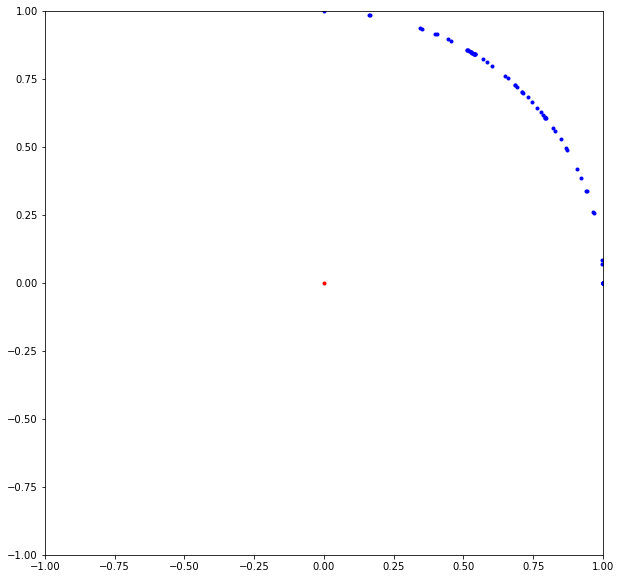

In [13]:
import math
import matplotlib.pyplot as plt
import random

#data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (73.0354, -157.92, -818.0), (60.1184, 79.7438, -818.0), (-54.1753, 165.575, -822.0), (63.3417, -134.233, -698.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (-44.8802, 141.85, -702.0), (-22.2046, -114.122, -598.0), (54.952, -114.613, -598.0), (55.3136, -115.388, -602.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (-37.4606, 121.916, -602.0), (18.3987, 26.0333, -262.633), (-6.25713, -31.6323, -167.762), (15.0978, -29.3332, -157.145), (-8.32315, 30.92, -153.448), (13.7425, -29.0253, -53.7111), (14.2403, -30.0991, -55.5892), (14.4652, 28.4783, -64.2589), (-6.02516, -31.1495, 70.1153), (-4.49266, -31.7318, 105.607), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.6971, -69.7712, -366.719), (-14.071, -71.6991, -376.774), (32.428, -64.9097, -342.31), (-19.9141, 69.6304, -343.239), (32.2492, 64.381, -141.323), (31.6714, -64.8493, -117.473), (32.0247, 63.936, -140.349), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (-9.34723, -71.9969, 242.672), (16.3643, -70.7321, 319.102), (51.4933, 104.393, -226.716), (52.2148, -103.166, -186.743), (-21.2823, -114.332, 264.273), (-13.6415, -114.648, 387.624), (-13.8145, -116.58, 394.172), (74.659, 154.446, -332.805), (75.5073, 156.317, -336.749), (80.2835, -151.741, -276.154), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (190.925, -589.678, -2945.5), (190.872, -589.77, -2948.5), (240.578, 267.294, -2948.5), (-267.803, 554.227, -2945.5), (174.429, -510.67, -2554.5), (206.721, 233.044, -2548.5), (-225.436, 486.134, -2551.5), (156.161, -427.805, -2151.5), (171.297, 198.543, -2148.5), (-181.903, 415.843, -2151.5), (138.333, -355.741, -1798.5), (-144.258, 351.669, -1795.5), (121.071, -294.981, -1498.5), (-114.065, 295.615, -1495.5), (102.655, -237.833, -1218.5), (102.691, -237.807, -1215.5), (-87.6601, 242.014, -1215.5), (128.364, -226.459, -417.8), (-45.4458, -260.608, 605.0), (190.677, -310.533, -584.2), (-59.6324, -356.696, 827.6), (283.547, -417.049, -809.4), (402.361, -529.773, -1069.6), (397.369, -525.466, -1059.4), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (624.078, -691.922, -1505.5), (474.165, -588.638, -1214.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
#data = [(59.9066, -24.6788, -1498.0), (94.6938, -17.5662, -1502.0), (87.6481, 10.6346, -1502.5), (51.8598, -21.6163, -1298.0), (82.1165, -15.4722, -1302.0), (76.0343, 9.51993, -1302.5), (43.9802, -18.5361, -1102.5), (43.7821, -18.4869, -1098.0), (43.9562, -18.5489, -1102.0), (69.5197, -13.2707, -1102.0), (69.2116, -13.196, -1097.5), (64.4202, 8.35511, -1102.5), (64.1678, 8.33498, -1098.0), (94.1312, 126.467, -1098.0), (94.4023, 126.972, -1102.0), (22.8798, 169.268, -1098.0), (38.3957, -16.3453, -962.5), (38.2004, -16.229, -958.0), (38.3569, -16.3305, -962.0), (60.7064, -11.669, -962.0), (60.4065, -11.6504, -957.5), (56.2785, 7.46357, -962.5), (55.9918, 7.45193, -958.0), (83.6368, 109.525, -958.0), (83.9407, 110.019, -962.0), (18.0781, 148.236, -958.0), (32.7893, -14.0826, -822.5), (32.6246, -13.9736, -818.0), (51.893, -10.0673, -822.0), (32.7783, -14.0656, -822.0), (152.16, -32.0637, -818.0), (51.617, -10.0558, -817.5), (48.111, 6.57, -822.5), (102.691, 117.65, -818.0), (72.7167, 92.8523, -818.0), (73.0032, 93.3447, -822.0), (13.8147, 127.083, -818.0), (13.9074, 127.698, -822.0), (28.0332, -12.1063, -702.5), (27.8733, -12.0055, -698.0), (28.0334, -12.1037, -702.0), (44.3493, -8.71905, -702.0), (130.266, -26.3492, -698.0), (44.1017, -8.66188, -697.5), (130.995, -26.5272, -702.0), (41.1498, 5.77137, -702.5), (40.9015, 5.73162, -698.0), (62.992, 78.778, -698.0), (89.0119, 100.432, -702.0), (88.5338, 99.8472, -698.0), (10.4647, 108.858, -698.0), (10.5915, 109.459, -702.0), (37.8648, -7.48498, -598.0), (38.0987, -7.52693, -602.0), (111.847, -21.8632, -598.0), (35.0391, 4.99125, -597.5), (37.8277, -7.46594, -597.5), (112.582, -22.0403, -602.0), (35.3515, 5.06425, -602.5), (35.071, 5.00031, -598.0), (54.667, 67.2018, -598.0), (76.9965, 85.8, -602.0), (76.5133, 85.2149, -598.0), (8.09521, 93.6189, -598.0), (21.3745, 24.5993, -220.422), (1.54414, 33.8455, -211.319), (31.6927, -5.18613, -164.508), (22.0565, 23.2445, -163.124), (23.062, 24.3357, -170.968), (1.41843, 31.9052, -198.874), (-29.1312, -14.5807, -111.336), (28.6688, 15.0984, -97.0176), (2.19961, 31.3653, -100.998), (-28.8932, -14.1201, -64.4281), (-29.7833, -14.5938, -66.6123), (-7.92645, -31.5381, -0.395386), (-7.81242, -31.0486, -0.299115), (5.26833, -31.4636, 40.4573), (22.4734, 22.0345, 49.7859), (23.9063, 23.3792, 52.545), (-17.1635, 26.8242, 8.37987), (-31.8557, -5.64698, 83.9967), (-28.8544, 13.6847, 85.9536), (-31.16, 14.6296, 92.0151), (-31.3037, 3.29024, 170.726), (5.13573, 71.8207, -455.859), (69.9505, -12.5462, -370.733), (71.65, -12.899, -379.924), (49.1698, 53.2383, -376.416), (-63.488, -33.5351, -252.449), (63.6876, 33.2617, -222.171), (4.27349, 71.289, -236.837), (-64.6562, -32.7752, -152.113), (-15.7252, -69.9564, -7.84605), (-37.6347, 60.4934, 11.6294), (13.3849, -70.3718, 83.8818), (13.8609, -72.4397, 86.196), (52.0733, 49.3082, 106.232), (-70.271, -17.3578, 180.565), (-65.355, 28.1478, 184.54), (-67.4067, 28.8773, 190.02), (-72.1138, 12.1402, 388.841), (102.168, 52.8684, -359.219), (104.013, 53.7995, -365.767), (5.62263, 115.43, -386.568), (-101.778, -53.4869, -244.48), (-22.4295, -114.285, -16.5174), (-59.6997, 99.2051, 15.3406), (24.2091, -113.263, 132.232), (86.2797, 78.5104, 169.435), (-110.041, -35.424, 287.78), (-107.351, 41.3183, 295.177), (-109.298, 41.8406, 300.252), (-150.848, -83.1792, -369.23), (-27.5721, -170.021, -27.2114), (-85.3814, 148.076, 20.0537), (-86.2708, 149.851, 20.2263), (40.6794, -166.929, 193.681), (129.683, 112.399, 246.798), (-157.173, -67.1197, 428.755), (-158.64, -68.363, 433.512), (-162.364, 53.0586, 437.308), (-164.172, 53.3604, 441.959), (-109.976, 25.0185, 598.0), (-26.3324, 20.4764, 702.0), (-26.1765, 20.3513, 697.5), (-26.3427, 20.5116, 702.5), (-127.37, 32.5539, 698.0), (-30.743, 24.2547, 822.0), (-30.5821, 24.1141, 817.5), (-30.7645, 24.2768, 822.5), (-148.176, 43.5202, 822.0), (-147.515, 43.1446, 818.0), (-35.6174, 28.6119, 957.5), (-35.7969, 28.7681, 962.5), (-40.6203, 33.1477, 1097.5), (-40.7976, 33.3109, 1102.5), (-47.6097, 39.7748, 1297.5), (-54.5216, 46.5329, 1497.5), (520.433, -173.939, -2948.5), (325.349, 452.748, -2948.5), (325.253, 452.447, -2945.5), (208.569, 359.35, -2951.5), (117.444, 440.503, -2951.5), (455.206, -145.879, -2551.5), (286.29, 390.078, -2554.5), (184.727, 308.671, -2545.5), (95.2191, 382.385, -2551.5), (94.9134, 381.392, -2548.5), (387.503, -116.466, -2151.5), (246.718, 325.459, -2154.5), (161.479, 257.892, -2145.5), (72.0813, 323.908, -2148.5), (-43.0103, 629.612, -2145.5), (326.617, -91.0185, -1798.5), (210.684, 268.881, -1798.5), (141.185, 213.788, -1795.5), (53.4005, 272.839, -1798.5), (-25.4588, 531.809, -1804.5), (-533.151, -430.725, -1498.5), (273.779, -70.8576, -1498.5), (179.272, 221.614, -1498.5), (-12.7656, 444.183, -1504.5), (-449.881, -332.703, -1218.5), (-3.56, 360.6, -1218.5), (3.49333, 261.608, -881.6), (-222.064, -131.145, -555.6), (-27.4813, -259.074, -45.0), (-122.862, 228.784, 27.0), (203.478, 162.391, 372.2), (-254.504, 60.4809, 671.4), (-302.782, -193.412, -777.8), (-300.443, -191.462, -771.4), (-14.7667, -359.051, -65.2), (-160.831, 328.414, 36.6), (-158.783, 322.353, 35.4), (120.63, -344.674, 406.6), (117.538, -339.133, 400.0), (290.573, 211.034, 512.6), (-356.027, 52.1851, 931.92), (25.4778, -495.866, -94.0), (-198.866, 460.777, 47.4), (195.56, -458.567, 554.6), (424.722, 267.085, 716.0), (419.071, 265.127, 707.5), (106.018, -647.809, -128.8), (-226.371, 616.601, 60.4), (305.099, -582.442, 734.8), (584.33, 309.441, 948.6), (578.479, 308.33, 940.2), (-465.303, 21.9242, 1221.5), (-563.362, -23.1158, 1498.5), (-658.996, -87.6892, 1795.5), (-88.7046, 855.23, -2947.5), (-696.993, -680.517, -2155.5), (-612.805, -541.246, -1794.5), (231.508, -787.922, -168.2), (-236.777, 784.195, 76.0), (439.798, -692.759, 921.6), (451.898, -920.266, -222.2), (-222.302, 992.854, 97.6), (772.398, 329.326, 1214.5), (-755.67, -178.636, 2144.5), (-841.99, -288.72, 2555.5), (-842.761, -287.346, 2547.5)]    
#data = [(74.5791, 18.7019, -1498.0), (64.5581, 16.3475, -1298.0), (54.6152, 13.909, -1098.0), (54.7899, 13.9544, -1102.0), (47.6258, 12.1795, -958.0), (47.8209, 12.2584, -962.0), (40.8605, 10.5133, -822.5), (40.6364, 10.4501, -818.0), (40.8193, 10.4947, -822.0), (34.8866, 8.98988, -702.5), (34.6862, 8.97018, -698.0), (34.8622, 9.00137, -702.0), (-147.462, 62.8427, -698.0), (29.9064, 7.7453, -602.5), (29.6804, 7.66555, -598.0), (29.898, 7.75694, -602.0), (-127.871, 49.9292, -598.0), (-128.682, 50.4098, -602.0), (-31.5864, 7.07015, -141.2), (-31.0981, 6.93529, -139.0), (-31.9055, -5.50469, -63.056), (-3.57057, -31.7838, -25.4438), (16.5893, -28.0009, -29.4773), (29.0088, 13.7897, 0.746876), (32.925, 2.58876, -11.5666), (32.6593, 3.34871, 0.128124), (30.0839, 14.2573, 0.803123), (1.47582, 34.3461, -59.9671), (-30.3159, -8.55085, 17.4089), (-19.5865, -25.4608, 16.865), (31.1501, -6.0144, 3.90648), (28.5514, 13.5977, 0.715626), (32.1525, 3.29815, 0.103951), (29.606, 14.0491, 0.771873), (-2.03589, 31.6042, 14.4076), (-2.08934, 32.5751, 14.8907), (7.68493, -31.1432, 135.814), (31.8255, -2.83178, 113.019), (-21.1411, -23.5261, 174.417), (-21.8604, -24.3651, 180.542), (17.5965, -27.1013, 270.624), (-16.4771, -26.9592, 289.262), (-69.3461, 19.6434, -313.023), (-70.0024, -12.808, -137.19), (5.97047, 71.36, -123.526), (-7.51706, -71.9203, -56.0689), (37.3427, -61.3198, -63.551), (72.152, 6.05238, -23.9389), (-69.834, -18.2994, 41.3285), (-44.5631, -56.0451, 39.1781), (69.716, -14.0517, 10.1656), (71.7163, -14.4825, 10.4887), (71.4738, 6.74731, 1.67188), (65.2158, 28.2501, 3.07812), (66.906, 28.8557, 3.19062), (-5.308, 71.8232, 34.1962), (71.6982, -2.209, 255.62), (16.6993, -70.5766, 308.678), (-113.438, -22.1132, -222.173), (14.8566, 114.597, -198.455), (15.3452, 116.702, -201.97), (-11.1975, -115.874, -89.5369), (61.2978, -97.9029, -101.341), (115.369, 10.3137, -37.5852), (-111.846, -26.8988, 66.4089), (-113.899, -27.2742, 67.6278), (-73.9016, -89.6604, 64.318), (113.723, -24.042, 17.3314), (114.955, 9.86314, 3.35938), (107.074, 41.693, 5.66563), (108.899, 42.2025, 5.77813), (-9.66327, 114.996, 55.4422), (116.718, 3.67305, 418.795), (25.3324, -112.367, 490.441), (32.5092, 169.916, -297.225), (93.5895, -144.287, -150.24), (-14.801, -171.251, -131.698), (172.103, 16.6093, -55.5266), (168.085, -37.51, 26.2531), (170.565, 12.6533, 5.53385), (172.625, 12.7341, 5.60938), (162.293, 53.7447, 8.92812), (164.338, 54.0822, 9.04751), (-168.287, -35.8105, 99.624), (-112.526, -130.055, 95.7036), (-16.551, 171.088, 83.1214), (-36.2281, -54.1584, 598.0), (-36.5159, -54.4689, 602.0), (29.9758, -137.168, 598.0), (38.632, -59.836, 598.0), (164.574, 16.7005, 598.0), (-33.9642, 1.51487, 702.5), (-43.2576, -62.3888, 698.0), (-43.5496, -62.6932, 702.0), (34.076, -160.279, 698.0), (45.0206, -69.8784, 698.0), (-33.9371, 1.48858, 702.0), (-33.7288, 1.47588, 697.5), (-39.7507, 1.91209, 822.5), (-51.9625, -72.042, 818.0), (-52.2723, -72.3462, 822.0), (52.6864, -81.9094, 818.0), (-39.7378, 1.90422, 822.0), (-39.5086, 1.88061, 817.5), (-46.5023, 2.38382, 962.5), (-62.8269, -83.2079, 962.0), (61.8011, -96.4148, 962.0), (61.5499, -96.0007, 958.0), (-46.2499, 2.361, 957.5), (-53.2578, 2.9054, 1102.5), (-73.397, -93.2803, 1098.0), (-73.7204, -93.5954, 1102.0), (70.6713, -110.49, 1102.0), (70.4151, -110.092, 1098.0), (-53.027, 2.89437, 1097.5), (-89.3871, -107.527, 1298.0), (82.9998, -130.233, 1298.0), (-62.7204, 3.75757, 1297.5), (-106.085, -120.827, 1498.0), (-72.466, 4.67503, 1497.5), (-339.543, 526.156, -2948.5), (-328.019, 438.452, -2551.5), (-328.416, 437.912, -2545.5), (-315.014, 349.62, -2154.5), (-293.961, 269.244, -1801.5), (-267.869, 203.859, -1498.5), (-595.363, -203.088, -1215.5), (423.613, 499.792, -1218.5), (-232.783, 147.607, -1215.5), (-251.487, -58.841, -496.4), (71.3897, 250.076, -449.0), (-18.2218, -261.228, -200.2), (149.661, -217.461, -229.8), (258.238, 27.7524, -83.2), (254.038, -61.6298, 40.2), (260.243, 14.223, 9.0), (254.24, 61.4543, 13.8), (-259.4, -43.9909, 152.8), (-252.79, -43.6568, 149.2), (-175.053, -188.289, 143.8), (-30.3857, 258.426, 126.4), (-262.385, -44.1464, 154.4), (251.266, 61.4182, 945.8), (-345.633, -90.5301, -687.4), (134.975, 336.012, -633.0), (-18.6429, -358.241, -273.6), (211.855, -290.159, -313.2), (360.138, 43.4876, -115.6), (353.758, 42.3838, -113.2), (360.141, 11.8765, 12.6), (356.521, 53.5245, 18.6), (347.765, -92.1119, 56.8), (-363.175, -44.0939, 212.6), (-356.689, -44.3527, 208.2), (-259.997, -255.487, 204.2), (-255.332, -252.097, 201.4), (-50.525, 356.576, 175.4), (-477.982, -144.993, -963.2), (252.783, 433.151, -897.12), (247.391, 429.853, -886.2), (-12.8838, -499.553, -381.4), (314.379, -393.855, -439.0), (498.102, 69.2952, -159.8), (505.074, 0.476575, 18.6), (500.069, 10.8995, 28.2), (498.996, 1.15838, 17.4), (477.466, -141.625, 78.4), (-88.0956, 494.921, 245.0), (-499.166, -29.7837, 291.0), (-377.146, -330.46, 283.2), (-372.027, -327.627, 279.6), (434.783, -496.117, -575.4), (2.75194, -658.916, -502.8), (653.66, 104.398, -211.4), (656.895, -91.1926, 39.0), (660.821, -22.368, 23.4), (625.805, -209.947, 104.8), (-141.956, 646.558, 324.0), (-139.605, 640.643, 320.4), (-526.492, -401.218, 376.6), (-663.001, 10.4455, 388.0), (50.9648, -280.983, 1218.5), (50.7753, -279.628, 1215.5), (308.433, 109.917, 1215.5), (57.1368, -345.503, 1498.5), (360.011, 171.404, 1501.5), (360.357, 172.015, 1504.5), (61.9471, -415.697, 1801.5), (402.767, 244.127, 1804.5), (65.5342, -496.031, 2151.5), (135.713, -215.951, 2148.5), (438.221, 328.346, 2151.5), (437.357, 327.194, 2148.5), (-201.609, -178.88, 2548.5), (68.3465, -586.732, 2548.5), (160.423, -256.432, 2548.5), (469.558, 417.093, 2548.5), (-239.598, -197.623, 2945.5), (70.7678, -676.223, 2945.5), (70.7017, -676.266, 2948.5), (185.066, -296.957, 2948.5), (-846.07, -365.572, -1802.5), (737.893, 479.623, -1797.5), (738.652, 477.646, -1802.5), (-724.827, -278.868, -1497.5), (580.698, 514.765, -1494.5), (568.955, -589.855, -715.6), (28.9588, -822.146, -630.6), (804.935, 144.934, -260.4), (783.154, -257.786, 48.6), (779.439, -250.895, 48.6), (820.538, -57.7025, 27.0), (764.758, -285.949, 130.0), (781.457, -254.667, 54.4), (777.682, -247.652, 54.4), (-209.383, 797.291, 406.6), (-681.034, -450.247, 466.4), (-814.027, 72.603, 477.2), (753.581, -690.784, -900.0), (747.175, -687.798, -889.2), (74.4463, -1020.52, -786.2), (1000.24, 207.585, -325.2), (1013.01, -117.136, 37.8), (849.482, -565.409, 76.0), (850.036, -555.619, 76.0), (938.461, -399.67, 168.2), (-305.428, 970.799, 498.8), (-903.241, -482.321, 601.8), (-1001.89, 194.612, 612.6)]
data = [(74.5791, 18.7019, -1498.0), (75.0161, -157.702, -1298.0), (64.5581, 16.3475, -1298.0), (61.2371, -134.586, -1098.0), (54.6152, 13.909, -1098.0), (54.7899, 13.9544, -1102.0), (-1.79594, -175.799, -962.0), (52.0382, -118.165, -958.0), (47.6258, 12.1795, -958.0), (47.8209, 12.2584, -962.0), (-3.67221, -150.342, -822.0), (43.1531, -101.508, -818.0), (40.8605, 10.5133, -822.5), (40.6364, 10.4501, -818.0), (40.8193, 10.4947, -822.0), (-4.66213, -128.448, -702.0), (36.1521, -87.6056, -702.5), (34.8866, 8.98988, -702.5), (34.6862, 8.97018, -698.0), (34.8622, 9.00137, -702.0), (-147.462, 62.8427, -698.0), (-146.369, -72.7994, -602.0), (-145.377, -72.3609, -598.0), (-5.01865, -110.176, -602.0), (30.2396, -75.422, -602.5), (29.9064, 7.7453, -602.5), (29.6804, 7.66555, -598.0), (29.898, 7.75694, -602.0), (-127.871, 49.9292, -598.0), (-128.682, 50.4098, -602.0), (10.6197, -29.5926, -234.243), (11.4929, -31.8892, -252.442), (-2.75332, -31.8299, -175.132), (-31.5864, 7.07015, -141.2), (-28.2312, -15.5883, -119.593), (31.3186, -3.02757, -95.668), (-31.0981, 6.93529, -139.0), (-30.8253, -8.59418, -48.6852), (-28.8767, -14.1673, -11.3459), (-31.9055, -5.50469, -63.056), (-29.7711, -14.6075, -11.6603), (-3.57057, -31.7838, -25.4438), (16.5893, -28.0009, -29.4773), (27.8085, -15.8552, -11.548), (26.4325, -18.7106, -28.4319), (29.9824, 11.005, -56.719), (29.0088, 13.7897, 0.746876), (32.2512, 4.5158, -45.393), (32.925, 2.58876, -11.5666), (32.6593, 3.34871, 0.128124), (31.7774, 5.87103, -8.4968), (21.4569, 23.9157, -52.3053), (23.6885, 21.4173, -24.3296), (30.0839, 14.2573, 0.803123), (32.2248, 11.8605, -60.8972), (16.0089, 27.7344, -18.0197), (22.2075, 24.7475, -54.0877), (1.47582, 34.3461, -59.9671), (-6.14735, 31.6808, -38.7202), (-28.5284, 14.3614, -24.801), (-26.8743, 17.7938, -15.213), (-30.3159, -8.55085, 17.4089), (-21.8739, -22.7057, 30.3073), (-19.5865, -25.4608, 16.865), (-22.9739, -23.8286, 31.8733), (18.4348, -25.6886, 10.6896), (31.1501, -6.0144, 3.90648), (28.5514, 13.5977, 0.715626), (32.1525, 3.29815, 0.103951), (29.606, 14.0491, 0.771873), (20.746, 24.9021, 45.9289), (-2.03589, 31.6042, 14.4076), (-12.7482, 28.8484, 46.7465), (-2.08934, 32.5751, 14.8907), (-31.3592, 2.30721, 22.2955), (-31.3279, 2.8628, 9.28957), (-0.254505, -31.9709, 100.867), (7.68493, -31.1432, 135.814), (-0.228214, -33.9099, 107.042), (31.8255, -2.83178, 113.019), (29.499, 14.9121, 88.3767), (-21.1411, -23.5261, 174.417), (-21.8604, -24.3651, 180.542), (15.2268, 27.5617, 164.202), (17.5965, -27.1013, 270.624), (-16.4771, -26.9592, 289.262), (-4.64051, -71.3044, -390.456), (-69.3461, 19.6434, -313.023), (-63.2111, -33.9141, -264.623), (71.4901, -9.07893, -217.516), (-70.0024, -12.808, -137.19), (-69.7711, -18.435, -108.233), (70.4282, 11.0542, -97.6851), (48.8319, 53.4442, -116.486), (5.97047, 71.36, -123.526), (-12.23, 70.1427, -83.7962), (-65.6029, -31.479, -24.155), (-7.51706, -71.9203, -56.0689), (37.3427, -61.3198, -63.551), (58.1442, -42.0696, -61.5297), (62.207, -38.1888, -24.7954), (72.152, 6.05238, -23.9389), (70.3095, 13.6416, -17.3968), (72.3412, 14.0732, -17.8614), (53.803, 47.7175, -53.3215), (37.0123, 62.6376, -39.3346), (-57.4613, 43.1904, -32.3719), (-64.5863, 31.6884, -54.4061), (-69.834, -18.2994, 41.3285), (-49.9608, -50.5783, 69.757), (-44.5631, -56.0451, 39.1781), (43.0895, -58.1039, 25.9696), (69.716, -14.0517, 10.1656), (71.7163, -14.4825, 10.4887), (71.4738, 6.74731, 1.67188), (65.2158, 28.2501, 3.07812), (66.906, 28.8557, 3.19062), (-5.308, 71.8232, 34.1962), (-71.3463, 5.64157, 22.6507), (-71.3017, 4.57573, 52.1223), (-50.3154, -50.9249, 70.2412), (-51.7088, -52.2711, 72.1697), (50.1024, 53.2499, 104.842), (63.9556, 32.8948, 193.592), (0.498841, -73.5003, 233.72), (71.6982, -2.209, 255.62), (16.6993, -70.5766, 308.678), (36.7344, 62.7393, 381.396), (-102.603, -53.107, -425.361), (-104.491, -53.9966, -433.022), (114.448, -18.4737, -350.221), (-113.438, -22.1132, -222.173), (-112.023, -27.9344, -172.565), (-113.944, -28.3349, -175.475), (114.541, 20.369, -158.549), (79.0209, 84.5958, -185.73), (14.8566, 114.597, -198.455), (15.3452, 116.702, -201.97), (-11.1975, -115.874, -89.5369), (61.2978, -97.9029, -101.341), (92.6313, -68.7674, -98.1871), (86.9256, 75.4184, -84.6288), (-16.8568, 115.188, -136.464), (-104.781, 50.1576, -87.2511), (-105.067, -49.2027, -37.761), (97.5773, -64.6051, -38.8208), (115.369, 10.3137, -37.5852), (113.584, 23.2431, -27.398), (60.2527, 99.4367, -62.0533), (-87.1863, 75.5806, -50.5173), (-88.3851, 77.0942, -51.3128), (-111.846, -26.8988, 66.4089), (-113.899, -27.2742, 67.6278), (-73.9016, -89.6604, 64.318), (70.5708, -91.9627, 42.2038), (113.723, -24.042, 17.3314), (114.955, 9.86314, 3.35938), (107.074, 41.693, 5.66563), (108.899, 42.2025, 5.77813), (-9.66327, 114.996, 55.4422), (-115.573, 7.41897, 37.304), (-82.9523, -81.6356, 114.93), (-115.976, 6.23749, 85.5321), (85.3849, 79.1841, 167.951), (101.861, 53.355, 310.159), (103.595, 54.3122, 315.521), (2.63272, -116.929, 373.042), (116.718, 3.67305, 418.795), (25.3324, -112.367, 490.441), (32.5092, 169.916, -297.225), (-166.848, -38.3808, -255.3), (168.223, 34.5123, -233.673), (118.36, 123.298, -273.777), (119.783, 124.655, -276.927), (93.5895, -144.287, -150.24), (136.14, -104.458, -145.538), (-19.1747, 170.5, -201.186), (-14.801, -171.251, -131.698), (131.066, 110.445, -125.643), (91.0695, 145.489, -90.9133), (-118.333, 123.345, -73.6468), (-119.336, 125.252, -74.5032), (-155.628, 72.1554, -128.415), (-157.249, -71.371, -55.5734), (139.667, -102.027, -56.6454), (172.103, 16.6093, -55.5266), (168.025, 36.5475, -39.9966), (106.983, -133.506, 62.8506), (168.085, -37.51, 26.2531), (170.565, 12.6533, 5.53385), (172.625, 12.7341, 5.60938), (162.293, 53.7447, 8.92812), (164.338, 54.0822, 9.04751), (-171.703, 7.84274, 56.0526), (-168.287, -35.8105, 99.624), (-112.526, -130.055, 95.7036), (-16.551, 171.088, 83.1214), (-172.108, 6.91758, 127.489), (-124.729, -118.298, 170.395), (137.038, 105.599, 251.555), (152.023, 81.6762, 466.166), (-36.2281, -54.1584, 598.0), (-36.5159, -54.4689, 602.0), (-15.1364, -33.265, 602.0), (-15.0124, -33.0421, 597.5), (-15.1665, -33.2946, 602.5), (29.9758, -137.168, 598.0), (38.632, -59.836, 598.0), (164.574, 16.7005, 598.0), (60.4075, 97.3412, 602.0), (59.9696, 96.7229, 598.0), (-33.9642, 1.51487, 702.5), (-43.2576, -62.3888, 698.0), (-43.5496, -62.6932, 702.0), (-18.0973, -38.4796, 702.0), (-17.9792, -38.2447, 697.5), (34.076, -160.279, 698.0), (45.0206, -69.8784, 698.0), (71.5813, 112.68, 702.0), (71.1449, 112.06, 698.0), (-33.9371, 1.48858, 702.0), (-33.7288, 1.47588, 697.5), (-39.7507, 1.91209, 822.5), (-51.9625, -72.042, 818.0), (-21.6434, -44.649, 822.0), (-52.2723, -72.3462, 822.0), (-21.5093, -44.4153, 817.5), (52.6864, -81.9094, 818.0), (85.532, 130.745, 822.0), (-39.7378, 1.90422, 822.0), (-39.5086, 1.88061, 817.5), (-46.5023, 2.38382, 962.5), (-25.9932, -51.7472, 962.0), (-62.8269, -83.2079, 962.0), (-25.8445, -51.5087, 957.5), (61.8011, -96.4148, 962.0), (61.5499, -96.0007, 958.0), (-46.2499, 2.361, 957.5), (-53.2578, 2.9054, 1102.5), (-73.397, -93.2803, 1098.0), (-30.54, -58.5927, 1102.0), (-73.7204, -93.5954, 1102.0), (-30.3849, -58.3954, 1097.5), (70.6713, -110.49, 1102.0), (70.4151, -110.092, 1098.0), (-53.027, 2.89437, 1097.5), (-89.3871, -107.527, 1298.0), (-37.2927, -68.1768, 1302.0), (-37.162, -67.9626, 1297.5), (82.9998, -130.233, 1298.0), (-62.7204, 3.75757, 1297.5), (-106.085, -120.827, 1498.0), (-44.5115, -77.2773, 1502.0), (-72.466, 4.67503, 1497.5), (86.1058, -532.095, -2951.5), (213.976, -338.537, -2954.5), (213.867, -338.468, -2951.5), (-339.543, 526.156, -2948.5), (-657.528, -201.983, -2548.5), (61.8917, -460.743, -2551.5), (177.124, -295.0, -2548.5), (-328.019, 438.452, -2551.5), (-328.416, 437.912, -2545.5), (-549.03, -186.502, -2145.5), (39.7043, -388.618, -2148.5), (141.82, -251.727, -2145.5), (570.787, -356.746, -2148.5), (-315.014, 349.62, -2154.5), (-457.187, -169.89, -1801.5), (23.1035, -326.526, -1798.5), (112.988, -213.836, -1795.5), (503.971, -268.638, -1795.5), (-293.961, 269.244, -1801.5), (-377.779, -151.502, -1501.5), (11.4, -271.8, -1495.5), (440.314, -201.218, -1504.5), (-267.869, 203.859, -1498.5), (-595.363, -203.088, -1215.5), (-302.555, -130.248, -1215.5), (368.567, -140.819, -1215.5), (370.514, -142.388, -1224.5), (423.613, 499.792, -1218.5), (-232.783, 147.607, -1215.5), (-236.494, -108.33, -958.2), (251.129, -68.7953, -792.6), (-251.487, -58.841, -496.4), (-255.126, -51.1323, -387.4), (183.575, 182.982, -415.0), (71.3897, 250.076, -449.0), (251.188, 62.3216, -353.2), (-18.2218, -261.228, -200.2), (149.661, -217.461, -229.8), (204.416, -165.005, -222.2), (202.815, 163.455, -191.0), (-238.769, 104.756, -194.6), (-237.821, -102.971, -83.2), (197.751, -166.854, -83.2), (258.238, 27.7524, -83.2), (251.412, 59.7178, -59.2), (141.28, 215.176, -135.2), (-150.771, 213.771, -110.8), (-149.513, 208.001, -108.88), (254.038, -61.6298, 40.2), (260.243, 14.223, 9.0), (254.24, 61.4543, 13.8), (-259.4, -43.9909, 152.8), (-252.79, -43.6568, 149.2), (-175.053, -188.289, 143.8), (168.128, -196.412, 95.2), (-30.3857, 258.426, 126.4), (-261.421, 4.29851, 86.2), (-262.385, -44.1464, 154.4), (-264.381, 4.66375, 196.6), (-193.389, -172.984, 258.0), (226.527, 128.205, 381.4), (224.607, 125.127, 695.2), (19.5693, -260.626, 837.2), (251.266, 61.4182, 945.8), (-345.633, -90.5301, -687.4), (134.975, 336.012, -633.0), (-353.45, -59.221, -533.6), (344.03, 102.745, -491.6), (2.14482, 364.721, -431.0), (0.77423, 358.949, -424.2), (-18.6429, -358.241, -273.6), (211.855, -290.159, -313.2), (273.914, -233.42, -304.2), (286.448, 219.213, -264.0), (-331.732, 136.327, -267.6), (206.792, 297.136, -189.8), (-152.902, 330.377, -155.48), (-153.945, 324.146, -152.6), (-331.612, -135.571, -114.4), (255.764, -256.271, -117.4), (252.839, -250.868, -115.6), (360.138, 43.4876, -115.6), (353.758, 42.3838, -113.2), (345.659, 90.3318, -82.0), (-153.47, 327.181, -154.0), (-154.519, 320.77, -151.6), (360.141, 11.8765, 12.6), (356.521, 53.5245, 18.6), (-356.527, -5.13732, 118.0), (243.747, -264.132, 133.6), (347.765, -92.1119, 56.8), (-363.175, -44.0939, 212.6), (-356.689, -44.3527, 208.2), (-259.997, -255.487, 204.2), (-255.332, -252.097, 201.4), (-50.525, 356.576, 175.4), (-356.197, -1.63283, 265.2), (-273.833, -228.918, 355.8), (-362.596, -2.18671, 270.0), (-276.311, -230.549, 358.6), (341.672, 120.711, 542.0), (334.9, 122.292, 532.4), (311.058, 180.724, 974.0), (313.591, 182.425, 981.8), (-477.982, -144.993, -963.2), (252.783, 433.151, -897.12), (247.391, 429.853, -886.2), (-494.845, -59.4043, -742.4), (466.61, 174.434, -686.8), (45.6404, 498.633, -595.2), (-12.8838, -499.553, -381.4), (314.379, -393.855, -439.0), (369.893, -341.088, -425.0), (409.821, 290.836, -369.0), (-470.543, 174.932, -375.4), (299.211, 398.786, -260.4), (-469.339, -175.85, -159.8), (309.731, -396.36, -165.8), (498.102, 69.2952, -159.8), (-71.1767, 495.109, -229.4), (478.435, 141.583, -114.0), (505.074, 0.476575, 18.6), (500.069, 10.8995, 28.2), (498.996, 1.15838, 17.4), (477.466, -141.625, 78.4), (-502.29, -31.0575, 167.0), (358.9, -349.541, 187.4), (-88.0956, 494.921, 245.0), (-499.166, -29.7837, 291.0), (-377.146, -330.46, 283.2), (-372.027, -327.627, 279.6), (-501.037, -19.6863, 374.2), (-400.602, -302.959, 501.8), (-395.131, -300.093, 495.6), (502.417, 32.2105, 799.4), (497.168, 37.3044, 789.133), (-663.808, -42.2643, -994.6), (-657.653, -43.2616, -985.4), (-654.708, -43.7169, -980.4), (595.012, 276.321, -913.2), (126.528, 648.505, -792.8), (434.783, -496.117, -575.4), (2.75194, -658.916, -502.8), (463.121, -465.733, -556.0), (551.098, 359.062, -483.2), (-627.458, 206.84, -495.2), (416.684, 508.83, -344.0), (-625.599, -210.944, -210.2), (329.054, -577.043, -225.32), (329.269, -570.536, -223.4), (653.66, 104.398, -211.4), (622.89, 209.318, -149.2), (656.895, -91.1926, 39.0), (660.821, -22.368, 23.4), (625.805, -209.947, 104.8), (-659.508, -75.4215, 222.2), (501.385, -431.214, 249.8), (-141.956, 646.558, 324.0), (-139.605, 640.643, 320.4), (-526.492, -401.218, 376.6), (-663.001, 10.4455, 388.0), (-655.086, -50.266, 491.6), (-549.08, -370.44, 664.2), (44.0921, -377.232, 1218.5), (50.9648, -280.983, 1218.5), (50.7753, -279.628, 1215.5), (601.544, -233.867, 1218.5), (308.433, 109.917, 1215.5), (386.872, 233.194, 1224.5), (57.1368, -345.503, 1498.5), (68.209, -462.104, 1501.5), (360.011, 171.404, 1501.5), (360.357, 172.015, 1504.5), (467.811, 292.783, 1495.5), (171.54, 224.969, 1498.5), (61.9471, -415.697, 1801.5), (98.3509, -550.391, 1798.5), (402.767, 244.127, 1804.5), (554.932, 361.331, 1795.5), (213.493, 263.392, 1798.5), (65.5342, -496.031, 2151.5), (138.832, -653.325, 2148.5), (138.437, -652.193, 2145.5), (135.713, -215.951, 2148.5), (438.221, 328.346, 2151.5), (437.357, 327.194, 2148.5), (264.116, 306.591, 2151.5), (-201.609, -178.88, 2548.5), (68.3465, -586.732, 2548.5), (160.423, -256.432, 2548.5), (469.558, 417.093, 2548.5), (321.149, 355.403, 2551.5), (-239.598, -197.623, 2945.5), (70.7678, -676.223, 2945.5), (70.7017, -676.266, 2948.5), (185.066, -296.957, 2948.5), (374.201, 404.465, 2945.5), (-767.976, -216.466, -2947.5), (687.334, -550.903, -2947.5), (686.157, -550.507, -2952.5), (629.287, -454.969, -2544.5), (-846.07, -365.572, -1802.5), (737.893, 479.623, -1797.5), (738.652, 477.646, -1802.5), (-724.827, -278.868, -1497.5), (580.698, 514.765, -1494.5), (-993.078, 45.8865, -1502.5), (-808.164, -11.7215, -1217.5), (739.299, 440.079, -1217.5), (391.319, 902.954, -1225.5), (240.19, 784.452, -1003.0), (551.873, -609.754, -694.0), (548.732, -603.966, -694.0), (568.955, -589.855, -715.6), (28.9588, -822.146, -630.6), (704.915, 418.65, -601.8), (-790.419, 227.448, -620.7), (551.124, 614.336, -428.2), (545.798, 610.504, -428.2), (-784.435, -235.054, -260.4), (291.045, -768.118, -292.8), (293.63, -761.047, -282.0), (804.935, 144.934, -260.4), (783.154, -257.786, 48.6), (779.439, -250.895, 48.6), (820.538, -57.7025, 27.0), (764.758, -285.949, 130.0), (781.457, -254.667, 54.4), (777.682, -247.652, 54.4), (-805.336, -132.881, 271.2), (-209.383, 797.291, 406.6), (-681.034, -450.247, 466.4), (-814.027, 72.603, 477.2), (-814.236, -94.9015, 612.6), (-703.771, -421.359, 829.4), (753.581, -690.784, -900.0), (747.175, -687.798, -889.2), (74.4463, -1020.52, -786.2), (640.869, -794.778, -872.6), (-993.368, 234.9, -775.4), (902.396, 475.547, -758.8), (-990.18, 234.893, -769.6), (721.785, 723.753, -531.2), (716.257, 720.49, -531.2), (121.83, -1016.82, -385.0), (128.466, -1010.73, -385.0), (-990.712, -249.939, -325.2), (-984.418, -249.737, -325.2), (1000.24, 207.585, -325.2), (939.813, 406.784, -233.0), (1013.01, -117.136, 37.8), (849.482, -565.409, 76.0), (850.036, -555.619, 76.0), (938.461, -399.67, 168.2), (-991.959, -233.848, 346.8), (-305.428, 970.799, 498.8), (-903.241, -482.321, 601.8), (-1001.89, 194.612, 612.6), (-1007.97, -168.353, 769.6), (-1001.75, -165.673, 769.6), (-1010.95, -169.626, 775.4), (-909.782, -462.935, 1035.4), (655.158, 444.329, 2147.5), (186.668, -764.676, 2544.5), (771.791, 541.882, 2552.5), (237.52, -890.095, 2955.5)]
    

plt.figure(figsize = (10,10))
bucketWidth = 0.01

for i1 in [257]:#range(len(data)):
    x1,y1,z1 = data[i1]

    a = math.atan2(y1, x1)
    #print(round(ra,3), round(a,3))
    #assert(abs(centreAngle - abs(thetas[i1])) < 0.01)
    
    subAngles = []

    for i2 in range(len(data)):
        if (i1 != i2):
            x2,y2,z2 = data[i2]

            b = math.atan2(y2, x2)
            phi = math.atan2(y2-y1, x2-x1)
            if (x1*x2 + y1*y2 > 0 and (abs(a-b) < 1 or abs(abs(a-b) - 2*math.pi) < 1)):
                #subtendedAngle = abs(phi) - abs(b)

                A = math.sqrt(x1**2 + y1**2)
                B = math.sqrt(x2**2 + y2**2)
                AB = math.sqrt((x2-x1)**2 + (y2 - y1)**2)

                subtendedAngle = math.acos((B**2 + AB**2 - A**2)/(2 * B * AB))

                #while subtendedAngle < 0:
                #    subtendedAngle += 2*math.pi
                #while subtendedAngle > 2*math.pi:
                #    subtendedAngle -= 2*math.pi

                closer = False
                if subtendedAngle > math.pi/2: #Means the point i2 lies closer to the origin (on the circle) than i1
                    closer = True
                    subtendedAngle = math.pi - subtendedAngle
                
                sign = 1 if (x1 * y2 - x2 * y1) > 0 else 0
                
                subAngles.append(sign*subtendedAngle)

    plt.plot([math.cos(i) for i in subAngles], [math.sin(i) for i in subAngles], 'b.')
    plt.plot([0],[0], 'r.')
    plt.axis([-1,1,-1,1])
    plt.show()

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3])
plt.show()

RuntimeError: Invalid DISPLAY variable